><H4>Project Abstract - 005 <br> Triple Lottery</H4>
><H4> Team Members: </H4><i>Matthew Johnson&emsp;Brandon Brugman</i>


*Notes: Mega Millions draws occur twice a week on every Tuesday and Friday. Powerball draws occur three times a week on every Monday, Wednesday and Saturday.*

##### Libraries

In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import sys

# Data Preparation

The goal of this initial phase was to create a dataframe that represents the transactions for each month of 2021. Each CSV file has to passed in, set column names and ensure each the 'Date' columns are a Datetime type in order to manipulate later on. Each date is matched with the corresponding lottery jackpot and appended into one dataframe called *complete_data* for easy access.

##### Import Datasets

In [2]:
cwd = os.getcwd()

def load_datasets():
    global jan_data
    jan_data = pd.read_csv("2021-01 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    jan_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    jan_data = jan_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global feb_data
    feb_data = pd.read_csv("2021-02 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    feb_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    feb_data = feb_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global mar_data
    mar_data = pd.read_csv("2021-03 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    mar_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    mar_data = mar_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global apr_data
    apr_data = pd.read_csv("2021-04 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    apr_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    apr_data = apr_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global may_data
    may_data = pd.read_csv("2021-05 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    may_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    may_data = may_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global jun_data
    jun_data = pd.read_csv("2021-06 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    jun_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    jun_data = jun_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global jul_data
    jul_data = pd.read_csv("2021-07 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    jul_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    jul_data = jul_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global aug_data
    aug_data = pd.read_csv("2021-08 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    aug_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    aug_data = aug_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global sep_data
    sep_data = pd.read_csv("2021-09 BlueCube Sales Sample Data.csv", index_col = None, header = None, names = ['FranchiseID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','RoyaltySegment','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity'])

    global oct_data
    oct_data = pd.read_csv("2021-10 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    oct_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    oct_data = oct_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global nov_data
    nov_data = pd.read_csv("2021-11 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    nov_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    nov_data = nov_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    global dec_data
    dec_data = pd.read_csv("2021-12 BlueCube Sales Sample Data.csv", index_col = None, header = None)
    dec_data.rename(columns = {0:'FranchiseID',1:'CenterName',2:'City',3:'StateProvince',4:'ZipPostalCode',5:'CarWash',6:'StoreHours',7:'StoreSize',8:'CategoryName',9:'SubCategoryName',10:'SegmentName',11:'RoyaltySegment',16:'TransactionID',18:'WeekDayName',19:'IsWeekend',20:'IsHoliday',21:'TransactionDate',22:'TransactionTimeStamp',23:'TotalSales',24:'TotalQuantity'}, inplace=True)
    dec_data = dec_data[['FranchiseID','TransactionID','CenterName','City','StateProvince','ZipPostalCode','CarWash','StoreHours','StoreSize','CategoryName','SubCategoryName','SegmentName','WeekDayName','IsWeekend','IsHoliday','TransactionDate','TransactionTimeStamp','TotalSales','TotalQuantity']]

    location_data = pd.read_csv("Store Local Data.csv")

    # Fix County "5" which is Huntington Beach to 'Orange County'
    location_data['County'] = location_data['County'].replace('5', 'Orange')

    # Convert Dates to Datetime
    jan_data['TransactionDate'] = pd.to_datetime(jan_data['TransactionDate'])
    jan_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    feb_data['TransactionDate'] = pd.to_datetime(feb_data['TransactionDate'])
    feb_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    mar_data['TransactionDate'] = pd.to_datetime(mar_data['TransactionDate'])
    mar_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    apr_data['TransactionDate'] = pd.to_datetime(apr_data['TransactionDate'])
    apr_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    may_data['TransactionDate'] = pd.to_datetime(may_data['TransactionDate'])
    may_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    jun_data['TransactionDate'] = pd.to_datetime(jun_data['TransactionDate'])
    jun_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    jul_data['TransactionDate'] = pd.to_datetime(jul_data['TransactionDate'])
    jul_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    aug_data['TransactionDate'] = pd.to_datetime(aug_data['TransactionDate'])
    aug_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    sep_data['TransactionDate'] = pd.to_datetime(sep_data['TransactionDate'])
    sep_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    oct_data['TransactionDate'] = pd.to_datetime(oct_data['TransactionDate'])
    oct_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    nov_data['TransactionDate'] = pd.to_datetime(nov_data['TransactionDate'])
    nov_data.rename(columns={'TransactionDate':'Date'}, inplace=True)
    dec_data['TransactionDate'] = pd.to_datetime(dec_data['TransactionDate'])
    dec_data.rename(columns={'TransactionDate':'Date'}, inplace=True)

    jan_data = jan_data.merge(location_data, on = 'FranchiseID', how='left')
    feb_data = feb_data.merge(location_data, on = 'FranchiseID', how='left')
    mar_data = mar_data.merge(location_data, on = 'FranchiseID', how='left')
    apr_data = apr_data.merge(location_data, on = 'FranchiseID', how='left')
    may_data = may_data.merge(location_data, on = 'FranchiseID', how='left')
    jun_data = jun_data.merge(location_data, on = 'FranchiseID', how='left')
    jul_data = jul_data.merge(location_data, on = 'FranchiseID', how='left')
    aug_data = aug_data.merge(location_data, on = 'FranchiseID', how='left')
    sep_data = sep_data.merge(location_data, on = 'FranchiseID', how='left')
    oct_data = oct_data.merge(location_data, on = 'FranchiseID', how='left')
    nov_data = nov_data.merge(location_data, on = 'FranchiseID', how='left')
    dec_data = dec_data.merge(location_data, on = 'FranchiseID', how='left')
    
load_datasets()

##### Lottery Dataset Preparation

In [3]:
lottery_dates = pd.read_csv("LotteryJackpots.csv")
lottery_dates['Draw Date'] = pd.to_datetime(lottery_dates['Draw Date'])
lottery_dates.rename(columns = {'Draw Date':'Date'}, inplace=True)
lottery_dates.tail()

,Lottery,Date,Estimated Jackpot
641,Powerball,2021-12-25,$400 Million
642,Powerball,2021-12-27,$416 Million
643,Mega Millions,2021-12-28,$201 Million
644,Powerball,2021-12-29,$441 Million
645,Mega Millions,2021-12-31,$221 Million


#### Set BasketData for Later

In [4]:
basket_data = pd.concat([jan_data, feb_data], axis = 0)
basket_data = pd.concat([basket_data, mar_data], axis = 0)
basket_data = pd.concat([basket_data, apr_data], axis = 0)
basket_data = pd.concat([basket_data, may_data], axis = 0)
basket_data = pd.concat([basket_data, jun_data], axis = 0)
basket_data = pd.concat([basket_data, jul_data], axis = 0)
basket_data = pd.concat([basket_data, aug_data], axis = 0)
basket_data = pd.concat([basket_data, sep_data], axis = 0)
basket_data = pd.concat([basket_data, oct_data], axis = 0)
basket_data = pd.concat([basket_data, nov_data], axis = 0)
basket_data = pd.concat([basket_data, dec_data], axis = 0)

basket_data.to_csv('basketdataset.csv', index = False)
del basket_data

##### Append Lottery Dates and Summarize Items by Date

In [5]:
jan_data = jan_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
jan_data = jan_data.merge(lottery_dates, on = 'Date', how = 'left')

feb_data = feb_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
feb_data = feb_data.merge(lottery_dates, on = 'Date', how = 'left')

mar_data = mar_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
mar_data = mar_data.merge(lottery_dates, on = 'Date', how = 'left')

apr_data = apr_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
apr_data = apr_data.merge(lottery_dates, on = 'Date', how = 'left')

may_data = may_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
may_data = may_data.merge(lottery_dates, on = 'Date', how = 'left')

jun_data = jun_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
jun_data = jun_data.merge(lottery_dates, on = 'Date', how = 'left')

jul_data = jul_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
jul_data = jul_data.merge(lottery_dates, on = 'Date', how = 'left')

aug_data = aug_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
aug_data = aug_data.merge(lottery_dates, on = 'Date', how = 'left')

sep_data = sep_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
sep_data = sep_data.merge(lottery_dates, on = 'Date', how = 'left')

oct_data = oct_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
oct_data = oct_data.merge(lottery_dates, on = 'Date', how = 'left')

nov_data = nov_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
nov_data = nov_data.merge(lottery_dates, on = 'Date', how = 'left')

dec_data = dec_data.groupby(["SubCategoryName", "Date","WeekDayName","IsWeekend","IsHoliday", "FranchiseID","County"]).agg({'TotalSales': 'sum', 'TotalQuantity':'sum'}).reset_index()
dec_data = dec_data.merge(lottery_dates, on = 'Date', how = 'left')

##### Example of Month Dataframe 

In [6]:
sep_data.head()

,SubCategoryName,Date,WeekDayName,IsWeekend,IsHoliday,FranchiseID,County,TotalSales,TotalQuantity,Lottery,Estimated Jackpot
0,ACCESSORIES,2021-09-01,Wednesday,0,0,5006,Orange,7.99,1.0,Powerball,$345 Million
1,ACCESSORIES,2021-09-01,Wednesday,0,0,5014,Los Angeles,29.99,1.0,Powerball,$345 Million
2,ACCESSORIES,2021-09-01,Wednesday,0,0,5086,Los Angeles,15.98,2.0,Powerball,$345 Million
3,ACCESSORIES,2021-09-01,Wednesday,0,0,5122,Orange,9.99,1.0,Powerball,$345 Million
4,ACCESSORIES,2021-09-01,Wednesday,0,0,5256,Orange,1.99,1.0,Powerball,$345 Million


##### Full Year Dataset

In [7]:
complete_data = pd.concat([jan_data, feb_data], axis = 0)
complete_data = pd.concat([complete_data, mar_data], axis = 0)
complete_data = pd.concat([complete_data, apr_data], axis = 0)
complete_data = pd.concat([complete_data, may_data], axis = 0)
complete_data = pd.concat([complete_data, jun_data], axis = 0)
complete_data = pd.concat([complete_data, jul_data], axis = 0)
complete_data = pd.concat([complete_data, aug_data], axis = 0)
complete_data = pd.concat([complete_data, sep_data], axis = 0)
complete_data = pd.concat([complete_data, oct_data], axis = 0)
complete_data = pd.concat([complete_data, nov_data], axis = 0)
complete_data = pd.concat([complete_data, dec_data], axis = 0)

del jan_data, feb_data, mar_data, apr_data, may_data, jun_data, jul_data, aug_data, sep_data, oct_data, nov_data, dec_data
gc.collect()

0

In [8]:
complete_data['Month'] = complete_data['Date'].dt.month
complete_data.sort_values(by=['Date','SubCategoryName'], ascending=True, inplace=True)
complete_data['Estimated Jackpot'] = complete_data['Estimated Jackpot'].fillna(method='ffill')

# Convert from Ex. "$401 Million" to 401
complete_data['Estimated Jackpot'] = complete_data['Estimated Jackpot'].astype(str)
complete_data['Estimated Jackpot'] = complete_data['Estimated Jackpot'].apply(lambda x: x.replace('$',''))
complete_data['Estimated Jackpot'] = complete_data['Estimated Jackpot'].apply(lambda x: x.replace('Million',''))
complete_data['Estimated Jackpot'] = complete_data['Estimated Jackpot'].apply(lambda x: int(x.replace('Billion','')) * 1000 if x.find("Billion") != -1 else x)
complete_data['Estimated Jackpot'] = complete_data['Estimated Jackpot'].apply(lambda x: int(x))

complete_data['Powerball'] = complete_data.apply(lambda x: x['Estimated Jackpot'] if x['Lottery'] == 'Powerball' else np.nan, axis=1)
complete_data['Mega Millions'] = complete_data.apply(lambda x: x['Estimated Jackpot'] if x['Lottery'] == 'Mega Millions' else np.nan, axis=1)
complete_data['Powerball'] = complete_data['Powerball'].fillna(method='ffill')
complete_data['Mega Millions'] = complete_data['Mega Millions'].fillna(method='ffill')

# Fix Jan 1st missing Powerball
complete_data.loc[complete_data['Date'] == '2021-01-01', 'Powerball'] = 363

complete_data['Lottery Average'] = (complete_data['Powerball'] + complete_data['Mega Millions']) / 2
complete_data.to_csv('fulldataset.csv', index = False)

# exclude refunds
complete_data = complete_data[complete_data['TotalSales'] > 0]

complete_data # 588,357 rows

,SubCategoryName,Date,WeekDayName,IsWeekend,IsHoliday,FranchiseID,County,TotalSales,TotalQuantity,Lottery,Estimated Jackpot,Month,Powerball,Mega Millions,Lottery Average
0,ACCESSORIES,2021-01-01,Friday,0,1,5006,Orange,15.98,2.0,Mega Millions,401,1,363.0,401.0,382.0
1,ACCESSORIES,2021-01-01,Friday,0,1,5023,Los Angeles,12.99,1.0,Mega Millions,401,1,363.0,401.0,382.0
2,ACCESSORIES,2021-01-01,Friday,0,1,5121,Los Angeles,9.99,1.0,Mega Millions,401,1,363.0,401.0,382.0
3,ACCESSORIES,2021-01-01,Friday,0,1,5122,Orange,15.98,2.0,Mega Millions,401,1,363.0,401.0,382.0
4,ACCESSORIES,2021-01-01,Friday,0,1,5256,Orange,16.99,1.0,Mega Millions,401,1,363.0,401.0,382.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48530,SUGAR AND SUGAR SUBS CANDY,2021-12-31,Friday,0,0,5469,Orange,18.03,7.0,Mega Millions,221,12,441.0,221.0,331.0
48531,SUGAR AND SUGAR SUBS CANDY,2021-12-31,Friday,0,0,5490,California,13.25,7.0,Mega Millions,221,12,441.0,221.0,331.0
48625,WINE/CHAMPAGNE,2021-12-31,Friday,0,0,5025,Orange,19.98,2.0,Mega Millions,221,12,441.0,221.0,331.0
48626,WINE/CHAMPAGNE,2021-12-31,Friday,0,0,5387,Los Angeles,17.48,2.0,Mega Millions,221,12,441.0,221.0,331.0


#  Analysis

The evaluation process will be divided into several subsections in terms of exploration. The goal of this section is to identify any statistical trends associated with sales and jackpot amounts. The dataframe *complete_data* represents SubCategoryName item sales for each full day separated by FranchiseID. So we will use groupby in order to take the average of each full day of sales. 

### Item Sales by WeekDay (Mega Millions vs Powerball)

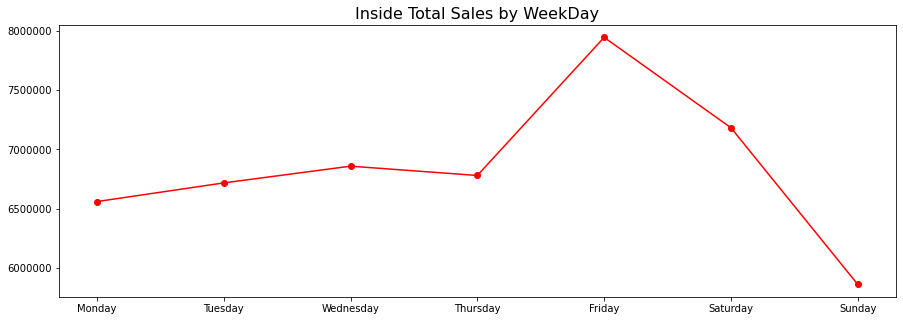

In [9]:
exclude_columns = ['ALL REGULAR','ALL HIGH - GRADE','ALL MID - GRADE','ALL DIESEL GRADES','ALL ETHANOL FUELS']

tmp = complete_data[~complete_data['SubCategoryName'].isin(exclude_columns)].groupby(['WeekDayName']).agg({'TotalSales':'sum','TotalQuantity':'sum'}).reset_index()
cats = ["Monday", "Tuesday","Wednesday","Thursday", "Friday","Saturday","Sunday"]
tmp = tmp.groupby(['WeekDayName']).agg({'TotalSales':'sum'}).reindex(cats).reset_index()
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(tmp['WeekDayName'],tmp['TotalSales'], marker = 'o', color='red')
plt.title("Inside Total Sales by WeekDay", size = 16)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #Remove Scientific Notation
plt.show()
del tmp

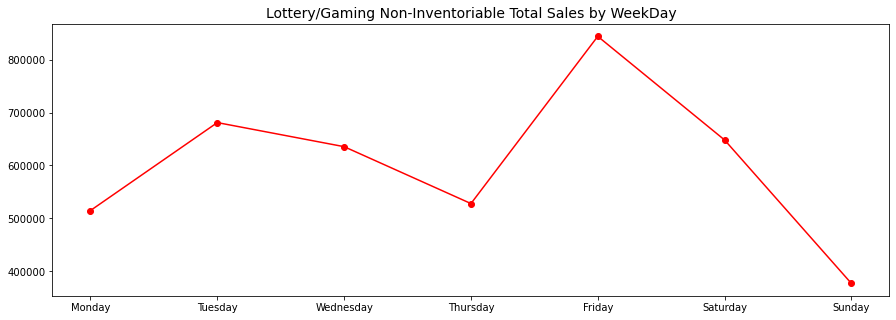

In [10]:
tmp = complete_data[complete_data['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE'].groupby(['WeekDayName']).agg({'TotalSales':'sum','TotalQuantity':'sum'}).reset_index()

cats = ["Monday", "Tuesday","Wednesday","Thursday", "Friday","Saturday","Sunday"]
tmp = tmp.groupby(['WeekDayName']).agg({'TotalSales':'sum'}).reindex(cats).reset_index()

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(tmp['WeekDayName'],tmp['TotalSales'], marker = 'o', color = 'red')
plt.title("Lottery/Gaming Non-Inventoriable Total Sales by WeekDay", size = 14)
plt.show()
del tmp

The first step of our process was evaluating the average sales between Mega Millions and Powerball to see if there was any distinguishable difference between the two in terms of sales on drawing dates. Over the 12 month period, the average daily sales for Lottery/Gaming Non Inventoriable items was about $70 higher for Mega Millions dates than Powerball dates. While this is interesting, it is far from telling a story. Powerball drawings occur on three days a week (Mon, Wed, Sat) while Mega Millions is only drawn on twice (Tue, Fri) which may be hindering the average. 

### Weekday & Jackpot Size Analysis

##### Weekday Average for Targeted Items

In [11]:
beer = complete_data[complete_data['SubCategoryName'] == 'BEER'].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
beer.rename(columns = {'TotalSales':'Beer Sales'}, inplace=True)

energy = complete_data[complete_data['SubCategoryName'] == 'ENERGY DRINK BEVERAGES'].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
energy.rename(columns = {'TotalSales':'Energy Drink Sales'}, inplace=True)

lottery = complete_data[complete_data['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE'].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
lottery.rename(columns = {'TotalSales':'Lottery Non-Inventoriable Sales'}, inplace=True)

scratchoffs = complete_data[complete_data['SubCategoryName'] == 'LOTTERY/GAMING INVENTORIABLE'].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
scratchoffs.rename(columns = {'TotalSales':'Lottery Inventoriable Sales'}, inplace=True)

smoking = complete_data[complete_data['SubCategoryName'] == 'SMOKING PRODUCTS'].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
smoking.rename(columns = {'TotalSales':'Smoking Sales'}, inplace=True)

merged = beer.merge(energy, on = ['WeekDayName'], how='left')
merged = merged.merge(lottery, on = ['WeekDayName'], how = 'left')
merged = merged.merge(scratchoffs, on = ['WeekDayName'], how = 'left')
merged = merged.merge(smoking, on = ['WeekDayName'], how = 'left')

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# merged.set_index(['WeekDayName'], inplace=True)
merged = merged.groupby(['WeekDayName']).sum().reindex(cats) 

del beer, energy, lottery, scratchoffs, smoking
merged

,Beer Sales,Energy Drink Sales,Lottery Non-Inventoriable Sales,Lottery Inventoriable Sales,Smoking Sales
WeekDayName,,,,,
Monday,194.271668,178.230379,297.208886,910.551475,762.394569
Tuesday,205.175162,183.884202,391.363218,888.923809,764.369853
Wednesday,218.773669,192.382317,363.576087,891.886349,769.472212
Thursday,232.619795,192.949527,302.839450,869.245139,769.446383
Friday,312.348006,206.719142,475.864270,970.710903,808.077518
Saturday,311.597752,174.532160,372.298679,839.917940,711.255136
Sunday,237.359276,137.740581,216.660161,688.400438,638.169050


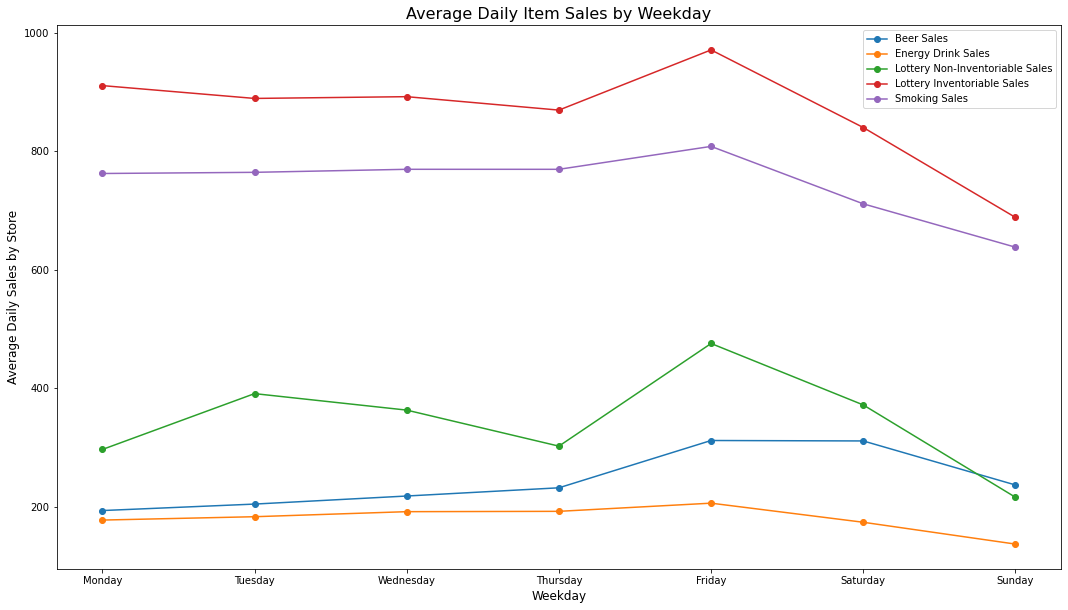

In [12]:
plt.rcParams['figure.figsize'] = [18, 10]
test = merged.squeeze()
test.plot(marker = 'o')
plt.legend()
plt.title("Average Daily Item Sales by Weekday", size = 16)
plt.ylabel("Average Daily Sales by Store", size = 12)
plt.xlabel("Weekday", size = 12)
plt.show()

##### Weekday Item Sales Average by Jackpot Size

In [13]:
under100 = complete_data[(complete_data['Estimated Jackpot'] > 0) & (complete_data['Estimated Jackpot'] < 100)].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
under100.rename(columns = {'TotalSales':'1-100 Million Sales'}, inplace=True)

mil100 = complete_data[(complete_data['Estimated Jackpot'] > 99) & (complete_data['Estimated Jackpot'] < 200)].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
mil100.rename(columns = {'TotalSales':'100-200 Million Sales'}, inplace=True)

mil200 = complete_data[(complete_data['Estimated Jackpot'] > 199) & (complete_data['Estimated Jackpot'] < 300)].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
mil200.rename(columns = {'TotalSales':'200-300 Million Sales'}, inplace=True)

mil300 = complete_data[(complete_data['Estimated Jackpot'] > 299) & (complete_data['Estimated Jackpot'] < 400)].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
mil300.rename(columns = {'TotalSales':'300-400 Million Sales'}, inplace=True)

mil400 = complete_data[(complete_data['Estimated Jackpot'] > 399) & (complete_data['Estimated Jackpot'] < 500)].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
mil400.rename(columns = {'TotalSales':'400-500 Million Sales'}, inplace=True)

mil500 = complete_data[(complete_data['Estimated Jackpot'] > 499) & (complete_data['Estimated Jackpot'] < 600)].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
mil500.rename(columns = {'TotalSales':'500-600 Million Sales'}, inplace=True)

mil600 = complete_data[(complete_data['Estimated Jackpot'] > 499)].groupby(['WeekDayName']).agg({'TotalSales':'mean'}).reset_index()
mil600.rename(columns = {'TotalSales':'600+ Million Sales'}, inplace=True)

merged = under100.merge(mil100, on = ['WeekDayName'], how='left')
merged = merged.merge(mil200, on = ['WeekDayName'], how = 'left')
merged = merged.merge(mil300, on = ['WeekDayName'], how = 'left')
merged = merged.merge(mil400, on = ['WeekDayName'], how = 'left')
merged = merged.merge(mil500, on = ['WeekDayName'], how = 'left')
merged = merged.merge(mil600, on = ['WeekDayName'], how = 'left')

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged.set_index(['WeekDayName'], inplace=True)
merged = merged.groupby(['WeekDayName']).sum().reindex(cats)
merged['500-600 Million Sales']=merged['500-600 Million Sales'].replace(0,merged['500-600 Million Sales'].median()) # No Tuesdays between 500-600, replaced with Median for graph
merged

,1-100 Million Sales,100-200 Million Sales,200-300 Million Sales,300-400 Million Sales,400-500 Million Sales,500-600 Million Sales,600+ Million Sales
WeekDayName,,,,,,,
Monday,467.926249,494.015348,498.667788,497.951578,488.624968,522.534260,479.697560
Tuesday,483.081219,497.994644,491.191931,514.260671,469.204881,459.620972,399.095374
Wednesday,471.348696,498.575804,506.094800,535.546221,466.187030,444.833113,425.003233
Thursday,475.043701,509.873494,500.536332,534.031183,467.165329,459.620972,440.730637
Friday,521.737147,545.383353,520.983953,545.674149,472.202027,466.618936,451.877001
Saturday,453.578819,481.740973,483.394684,482.434700,432.566631,508.014808,466.598953
Sunday,414.924688,430.798105,446.402750,432.720201,428.461794,459.093197,415.601342


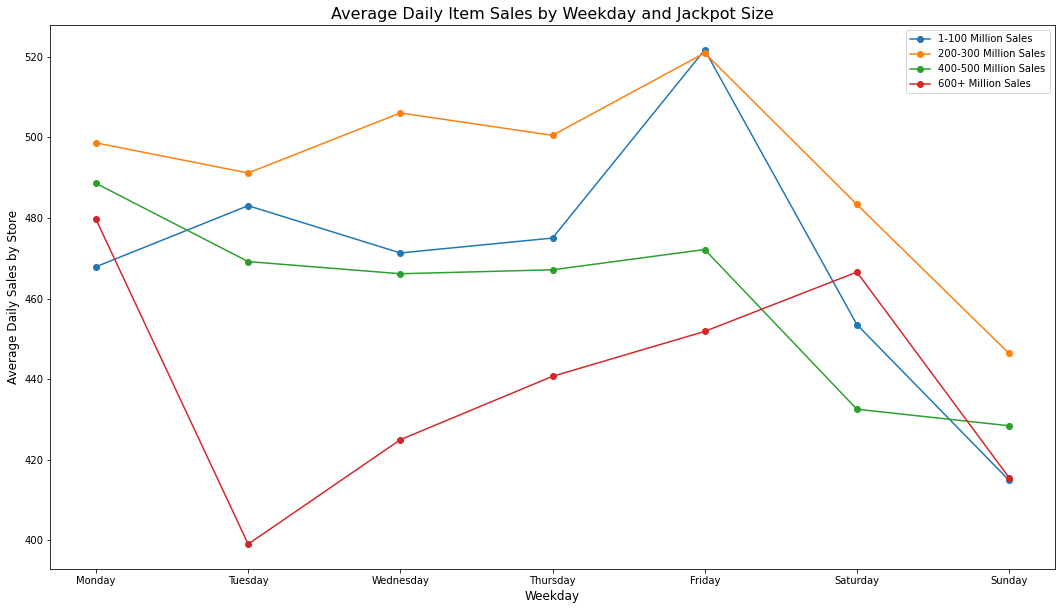

In [14]:
merged = merged[['1-100 Million Sales','200-300 Million Sales','400-500 Million Sales', '600+ Million Sales']]
plt.rcParams['figure.figsize'] = [18, 10]
test = merged.squeeze()
test.plot(marker = 'o')
plt.legend()
plt.title("Average Daily Item Sales by Weekday and Jackpot Size", size = 16)
plt.ylabel("Average Daily Sales by Store", size = 12)
plt.xlabel("Weekday", size = 12)
plt.show()

In an effort to spot changes between Powerball and Mega Millions, we calculated the percentages of the Mega Millions and Powerball sale dates for each item and divided by the sum of both. As a result, for each SubCategoryName, the percentage of the Mega Millions and Powerball will sum to 0 as non-lottery dates were excluded from this portion.

In [17]:
item_sales = complete_data.groupby(['SubCategoryName','Lottery','WeekDayName']).agg({'TotalSales':'mean','TotalQuantity':'mean'}).reset_index()

item_sales.sort_values(by = ['SubCategoryName','Lottery','WeekDayName'], inplace = True)
# complete_data.to_excel("items_monthly.xlsx", index = None)  
columns = ['LOTTERY/GAMING NON-INVENTORIABLE','LOTTERY/GAMING INVENTORIABLE', 'BEER','SMOKING PRODUCTS','ENERGY DRINK BEVERAGES','']
item_sales[(item_sales['SubCategoryName'].isin(columns))].sort_values(by=['SubCategoryName','WeekDayName','Lottery']).groupby(['SubCategoryName','Lottery','WeekDayName']).agg({'TotalSales':'mean'}).rename(columns = {'TotalSales':'Avg Daily Sales'})

Avg Daily Sales
SubCategoryName                  Lottery       WeekDayName                 
BEER                             Mega Millions Friday            312.348006
                                               Tuesday           205.175162
                                 Powerball     Monday            191.239578
                                               Saturday          311.597752
                                               Wednesday         218.773669
ENERGY DRINK BEVERAGES           Mega Millions Friday            206.719142
                                               Tuesday           183.884202
                                 Powerball     Monday            180.580086
                                               Saturday          174.532160
                                               Wednesday         192.382317
LOTTERY/GAMING INVENTORIABLE     Mega Millions Friday            970.710903
                                               Tuesday           888.923809
                                 Powerball     Monday            872.440135
                                               Saturday          839.917940
                                               Wednesday         891.886349
LOTTERY/GAMING NON-INVENTORIABLE Mega Millions Friday            475.864270
                                               Tuesday           391.363218
                                 Powerball     Monday            334.522727
                                               Saturday          372.298679
                                               Wednesday         363.576087
SMOKING PRODUCTS                 Mega Millions Friday            808.077518
                                               Tuesday           764.369853
                                 Powerball     Monday            765.242310
                                               Saturday          711.255136
                                               Wednesday         769.472212

In [18]:
items_lottery_sum = item_sales.groupby(['SubCategoryName','Lottery']).agg({'TotalSales':'mean', 'TotalQuantity':'mean'}).reset_index()

for i, rw in items_lottery_sum.iterrows():
    rw['SubCategoryName'] 
    items_lottery_sum.at[i,'PercentageSales'] = round(rw['TotalSales'] / np.sum(items_lottery_sum.loc[items_lottery_sum['SubCategoryName'] == rw['SubCategoryName']]['TotalSales']),2)

items_lottery_sum.sort_values(by=['TotalSales','SubCategoryName','PercentageSales'], ascending=False).head(15)

,SubCategoryName,Lottery,TotalSales,TotalQuantity,PercentageSales
12,ALL REGULAR,Mega Millions,9661.446143,2229.401519,0.51
13,ALL REGULAR,Powerball,9455.216789,2123.494810,0.49
6,ALL HIGH - GRADE,Mega Millions,4668.044651,1010.642373,0.50
7,ALL HIGH - GRADE,Powerball,4640.702797,981.001174,0.50
9,ALL MID - GRADE,Powerball,3011.354032,652.183884,0.50
8,ALL MID - GRADE,Mega Millions,2994.561952,665.571068,0.50
2,ALL DIESEL GRADES,Mega Millions,1483.430491,341.790211,0.53
3,ALL DIESEL GRADES,Powerball,1309.181766,291.558291,0.47
4,ALL ETHANOL FUELS,Mega Millions,1127.367203,388.877888,0.51
5,ALL ETHANOL FUELS,Powerball,1087.361213,357.078251,0.49


### Jackpot Size Case Study

#### October 3rd and 4th (685 Million) vs October 10th and 11th (38 Million)
In order to evaluate the effects of lottery size on sales, we wanted to specifically study the effects on sales.

In [19]:
# October 3rd and 4th Sales organized by FranchiseID and SubCategoryName
oct_3_4 = complete_data[(complete_data['Date'] == '10-04-2021') | (complete_data['Date'] == '10-05-2021')]
oct_3_4 = oct_3_4.groupby(['SubCategoryName','FranchiseID']).agg({'TotalSales':'sum', 'TotalQuantity':'sum'}).reset_index()
cat_temp = oct_3_4['SubCategoryName'].values
oct_3_4.sort_values(by=['TotalSales'], ascending=False, inplace=True)

In [20]:
# October 10th and 11th Sales organized by FranchiseID and SubCategoryName
oct_10_11 = complete_data[(complete_data['Date'] == '10-10-2021') | (complete_data['Date'] == '10-11-2021')]
oct_10_11 = oct_10_11.groupby(['SubCategoryName', 'FranchiseID']).agg({'TotalSales':'sum', 'TotalQuantity':'sum'}).reset_index()
oct_10_11.sort_values(by=['TotalSales'], ascending=False, inplace=True)

Now that we have two dataframes representing the two sets of dates, we can merge based on the item subcategory and franchiseID to see if any significant changes exist. The greatest differences all exist with 'All Regular' gas sales which could be contributed to the weather or gas prices during those particular weeks.

In [21]:
results = oct_3_4.merge(oct_10_11, on = ['SubCategoryName','FranchiseID'], how = 'left')
results.rename(columns = {'TotalSales_x':'TotalSales Oct 3rd/4th', 'TotalQuantity_x':'TotalQuantity Oct 3rd/4th', 'TotalSales_y':'TotalSales Oct 10th/11th','TotalQuantity_y':'TotalQuantity Oct 10th/11th'}, inplace=True)
results.fillna(0, inplace = True)
results['TotalSales Difference'] = results['TotalSales Oct 3rd/4th'] - results['TotalSales Oct 10th/11th']
results['Absolute'] = abs(results['TotalSales Difference'])
results['TotalQuantity Difference'] = results['TotalQuantity Oct 3rd/4th'] - results['TotalQuantity Oct 10th/11th']
results.sort_values(by=['Absolute'], ascending=False).head(5)

,SubCategoryName,FranchiseID,TotalSales Oct 3rd/4th,TotalQuantity Oct 3rd/4th,TotalSales Oct 10th/11th,TotalQuantity Oct 10th/11th,TotalSales Difference,Absolute,TotalQuantity Difference
1,ALL REGULAR,5122,34019.91,7591.25,24915.48,5569.60,9104.43,9104.43,2021.65
6,ALL REGULAR,5011,27848.47,6289.02,20430.55,4565.22,7417.92,7417.92,1723.80
10,ALL REGULAR,5452,23442.46,4986.54,16127.93,3387.47,7314.53,7314.53,1599.07
25,ALL REGULAR,5003,16887.00,3612.97,10974.22,2299.75,5912.78,5912.78,1313.22
4,ALL REGULAR,5004,30484.60,6536.88,25044.95,5371.31,5439.65,5439.65,1165.57


If we exclude gas-related subcategories, which subcategory will have the highest sales difference between Oct 3/4 and Oct 10/11?
- 4 out of the top 10 differences in sales were **Lottery/Gaming Non-Inventoriable** that saw an average decrease of \\$636.83 for each of the Franchise store locations in the LA/Orange county area.
- 3 out of the top 10 differences in sales were **Lottery/Gaming Inventoriable** that decreased on average by \\$269.48 for each location. 

In [22]:
results[~results['SubCategoryName'].isin(exclude_columns)].sort_values('Absolute', ascending=False).head(10)

,SubCategoryName,FranchiseID,TotalSales Oct 3rd/4th,TotalQuantity Oct 3rd/4th,TotalSales Oct 10th/11th,TotalQuantity Oct 10th/11th,TotalSales Difference,Absolute,TotalQuantity Difference
78,AUTOMATIC CAR WASH,5013,7482.83,218.0,10983.18,309.0,-3500.35,3500.35,-91.0
130,LOTTERY/GAMING INVENTORIABLE,5216,3001.00,112.0,246.00,47.0,2755.00,2755.00,65.0
119,LOTTERY/GAMING NON-INVENTORIABLE,5003,3575.00,547.0,1336.00,288.0,2239.00,2239.00,259.0
132,LOTTERY/GAMING NON-INVENTORIABLE,5343,2964.00,2964.0,1094.00,1094.0,1870.00,1870.00,1870.0
113,LOTTERY/GAMING INVENTORIABLE,5369,4039.00,397.0,2356.00,276.0,1683.00,1683.00,121.0
147,LOTTERY/GAMING NON-INVENTORIABLE,5369,2436.00,2436.0,832.00,832.0,1604.00,1604.00,1604.0
146,LOTTERY/GAMING INVENTORIABLE,5461,2438.00,178.0,877.00,91.0,1561.00,1561.00,87.0
134,LOTTERY/GAMING INVENTORIABLE,5086,2790.00,289.0,1333.00,192.0,1457.00,1457.00,97.0
148,HAND CAR WASH,5387,2426.97,108.0,3840.61,149.0,-1413.64,1413.64,-41.0
158,LOTTERY/GAMING NON-INVENTORIABLE,5014,1959.00,1959.0,662.00,662.0,1297.00,1297.00,1297.0


When we completely isolated the 'Lottery/Gaming' sales, we found that a significant number of stores exhibited a decrease from October 3rd/4th when the jackpot was \\$685 million to the following week when it dropped to \\$38 million. It is important that these differences are exhibited across many stores.

Out of 39 Franchise Stores:
- **Lottery/Gaming Inventoriable**
    - 16 stores saw an *increase* of Lottery/Gaming Inventoriable sales of \\$243.56 on average as the jackpot decreased.
    - 15 stores saw a *decrease* of Lottery/Gaming Inventoriable sales of \\$816.73 on average as the jackpot decreased.
    - 8 stores didn't have any sales on these two dates.
- **Lottery/Gaming Non-Inventoriable**
    - 35 stores saw an *decrease* of Lottery/Gaming Non-Inventoriable sales of \\$636.82 on average as the jackpot decreased.
    - 0 stores exhibited a decrease in Lottery/Gaming Inventoriable sales.
    - 4 stores didn't have any sales on these two dates.

In [23]:
tmp = results.sort_values(by=['TotalSales Difference'], ascending=False)
tmp = tmp[(tmp['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE') | (tmp['SubCategoryName'] == 'LOTTERY/GAMING INVENTORIABLE')]
tmp[(tmp['TotalSales Difference'] > 0) & (tmp['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE')].head()

,SubCategoryName,FranchiseID,TotalSales Oct 3rd/4th,TotalQuantity Oct 3rd/4th,TotalSales Oct 10th/11th,TotalQuantity Oct 10th/11th,TotalSales Difference,Absolute,TotalQuantity Difference
119,LOTTERY/GAMING NON-INVENTORIABLE,5003,3575.0,547.0,1336.0,288.0,2239.0,2239.0,259.0
132,LOTTERY/GAMING NON-INVENTORIABLE,5343,2964.0,2964.0,1094.0,1094.0,1870.0,1870.0,1870.0
147,LOTTERY/GAMING NON-INVENTORIABLE,5369,2436.0,2436.0,832.0,832.0,1604.0,1604.0,1604.0
158,LOTTERY/GAMING NON-INVENTORIABLE,5014,1959.0,1959.0,662.0,662.0,1297.0,1297.0,1297.0
189,LOTTERY/GAMING NON-INVENTORIABLE,5372,1281.0,0.0,366.0,0.0,915.0,915.0,0.0


## Analyzing Oct 4th Powerball Winning Impact on Individual Stores

#### Walport Enterprises, Inc. Orange County (Small Store)
October 3rd and 4th (685 million) versus October 10th and 11th (38 million)

Notable Changes:
- All Regular Gas Sales decreased by 2055.24
- Lottery/Gaming Non Inventoriable decreased by 1109.00
- Smoking Products decreased by 396.

In [24]:
franchise_5000_3_4 = complete_data[(complete_data['FranchiseID'] == 5000) & ((complete_data['Date'] == '10-03-2021') | (complete_data['Date'] == '10-04-2021'))]
franchise_5000_3_4 = franchise_5000_3_4.groupby(['SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum'}).reset_index()

franchise_5000_10_11 = complete_data[(complete_data['FranchiseID'] == 5000) & ((complete_data['Date'] == '10-10-2021') | (complete_data['Date'] == '10-11-2021'))]
franchise_5000_10_11 = franchise_5000_10_11.groupby(['SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum'}).reset_index()

result_5000 = franchise_5000_3_4.merge(franchise_5000_10_11, on = 'SubCategoryName', how = 'left')
result_5000.rename(columns = {'TotalSales_x':'TotalSales Oct 3rd/4th', 'TotalQuantity_x':'TotalQuantity Oct 3rd/4th', 'TotalSales_y':'TotalSales Oct 10th/11th','TotalQuantity_y':'TotalQuantity Oct 10th/11th'}, inplace=True)
result_5000['TotalSales Difference'] = result_5000['TotalSales Oct 3rd/4th'] - result_5000['TotalSales Oct 10th/11th']
result_5000['TotalQuantity Difference'] = result_5000['TotalQuantity Oct 3rd/4th'] - result_5000['TotalQuantity Oct 10th/11th']
result_5000['AbsoluteSalesChange'] = result_5000['TotalSales Difference'].abs()
result_5000.sort_values(by='AbsoluteSalesChange', ascending=False).head(10)

,SubCategoryName,TotalSales Oct 3rd/4th,TotalQuantity Oct 3rd/4th,TotalSales Oct 10th/11th,TotalQuantity Oct 10th/11th,TotalSales Difference,TotalQuantity Difference,AbsoluteSalesChange
3,ALL REGULAR,31877.12,7214.97,29821.88,6761.89,2055.24,453.08,2055.24
1,ALL MID - GRADE,10356.81,2245.01,12343.24,2680.33,-1986.43,-435.32,1986.43
0,ALL HIGH - GRADE,13705.71,2899.75,12045.05,2551.65,1660.66,348.10,1660.66
31,LOTTERY/GAMING NON-INVENTORIABLE,1750.00,1750.00,646.00,646.00,1104.00,1104.00,1104.00
45,SMOKING PRODUCTS,2960.64,519.00,2602.60,452.00,358.04,67.00,358.04
12,CHEWING TOBACCO,456.60,61.00,284.73,33.00,171.87,28.00,171.87
35,OTHER SMOKELESS PRODUCTS,209.05,35.00,97.49,18.00,111.56,17.00,111.56
2,ALL PROPANE,303.64,76.10,406.58,101.90,-102.94,-25.80,102.94
10,CARBONATD SFT DRINKS,264.73,108.00,178.90,74.00,85.83,34.00,85.83
40,SALTY SNACKS,226.21,101.00,141.14,67.00,85.07,34.00,85.07


#### Hamid Zerehi. Los Angeles County (Small Store)
October 3rd and 4th (685 million) versus October 10th and 11th (38 million) 

Notable Changes:
- All Regular Gas increased by 1865.16
- Lottery/Gaming Non Inventoriable decreased by 663.00
- Lottery/Gaming Inventoriable increased by 181.00

In [25]:
franchise_5002_3_4 = complete_data[(complete_data['FranchiseID'] == 5002) & ((complete_data['Date'] == '10-03-2021') | (complete_data['Date'] == '10-04-2021'))]
franchise_5002_3_4 = franchise_5002_3_4.groupby(['SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum'}).reset_index()

franchise_5002_10_11 = complete_data[(complete_data['FranchiseID'] == 5002) & ((complete_data['Date'] == '10-10-2021') | (complete_data['Date'] == '10-11-2021'))]
franchise_5002_10_11 = franchise_5002_10_11.groupby(['SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum'}).reset_index()

result_5002 = franchise_5002_3_4.merge(franchise_5002_10_11, on = 'SubCategoryName', how = 'left')
result_5002.rename(columns = {'TotalSales_x':'TotalSales Oct 3rd/4th', 'TotalQuantity_x':'TotalQuantity Oct 3rd/4th', 'TotalSales_y':'TotalSales Oct 10th/11th','TotalQuantity_y':'TotalQuantity Oct 10th/11th'}, inplace=True)
result_5002['TotalSales Difference'] = result_5002['TotalSales Oct 3rd/4th'] - result_5002['TotalSales Oct 10th/11th']
result_5002['TotalQuantity Difference'] = result_5002['TotalQuantity Oct 3rd/4th'] - result_5002['TotalQuantity Oct 10th/11th']
result_5002['AbsoluteSalesChange'] = result_5002['TotalSales Difference'].abs()
result_5002.sort_values(by='AbsoluteSalesChange', ascending=False).head(10)

,SubCategoryName,TotalSales Oct 3rd/4th,TotalQuantity Oct 3rd/4th,TotalSales Oct 10th/11th,TotalQuantity Oct 10th/11th,TotalSales Difference,TotalQuantity Difference,AbsoluteSalesChange
3,ALL REGULAR,18249.37,3904.83,20114.53,4303.29,-1865.16,-398.46,1865.16
1,ALL HIGH - GRADE,12048.15,2420.40,10352.64,2082.13,1695.51,338.27,1695.51
0,ALL DIESEL GRADES,2457.04,535.11,2245.39,458.95,211.65,76.16,211.65
32,LOTTERY/GAMING INVENTORIABLE,816.00,110.00,997.00,84.00,-181.00,26.00,181.00
33,LOTTERY/GAMING NON-INVENTORIABLE,503.00,109.00,347.00,102.00,156.00,7.00,156.00
2,ALL MID - GRADE,8216.66,1688.12,8106.02,1665.96,110.64,22.16,110.64
38,OTHER GENERAL MERCHANDISE,121.64,46.00,19.82,11.00,101.82,35.00,101.82
48,SMOKING PRODUCTS,1257.74,238.00,1199.72,251.00,58.02,-13.00,58.02
12,CARBONATD SFT DRINKS,119.99,58.00,80.77,39.00,39.22,19.00,39.22
43,SALTY SNACKS,132.05,67.00,160.97,69.00,-28.92,-2.00,28.92


#### Robert H. Lingley, Sr. Torrance (Medium Store)
October 3rd and 4th (685 million) versus October 10th and 11th (38 million)

Notable Changes:
- **Smoking Products** decreased by \\$1286.14
- **Lottery/Gaming Inventoriable** increased by \\$1175.00
- **Chewing Tobacco** increased by \\$446.28
- **Lottery/Gaming Non-Inventoriable** increased by \\$326.00

In [26]:
franchise_5003_3_4 = complete_data[(complete_data['FranchiseID'] == 5003) & ((complete_data['Date'] == '10-03-2021') | (complete_data['Date'] == '10-04-2021'))]
franchise_5003_3_4 = franchise_5002_3_4.groupby(['SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum'}).reset_index()

franchise_5003_10_11 = complete_data[(complete_data['FranchiseID'] == 5003) & ((complete_data['Date'] == '10-10-2021') | (complete_data['Date'] == '10-11-2021'))]
franchise_5003_10_11 = franchise_5003_10_11.groupby(['SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum'}).reset_index()

result_5003 = franchise_5003_3_4.merge(franchise_5003_10_11, on = 'SubCategoryName', how = 'left')
result_5003.rename(columns = {'TotalSales_x':'TotalSales Oct 3rd/4th', 'TotalQuantity_x':'TotalQuantity Oct 3rd/4th', 'TotalSales_y':'TotalSales Oct 10th/11th','TotalQuantity_y':'TotalQuantity Oct 10th/11th'}, inplace=True)
result_5003['TotalSales Difference'] = result_5003['TotalSales Oct 3rd/4th'] - result_5003['TotalSales Oct 10th/11th']
result_5003['TotalQuantity Difference'] = result_5003['TotalQuantity Oct 3rd/4th'] - result_5003['TotalQuantity Oct 10th/11th']
result_5003['AbsoluteSalesChange'] = result_5003['TotalSales Difference'].abs()
result_5003.sort_values(by='AbsoluteSalesChange', ascending=False).head(10)

,SubCategoryName,TotalSales Oct 3rd/4th,TotalQuantity Oct 3rd/4th,TotalSales Oct 10th/11th,TotalQuantity Oct 10th/11th,TotalSales Difference,TotalQuantity Difference,AbsoluteSalesChange
3,ALL REGULAR,18249.37,3904.83,10974.22,2299.75,7275.15,1605.08,7275.15
1,ALL HIGH - GRADE,12048.15,2420.40,7171.54,1385.02,4876.61,1035.38,4876.61
2,ALL MID - GRADE,8216.66,1688.12,3708.64,745.51,4508.02,942.61,4508.02
48,SMOKING PRODUCTS,1257.74,238.00,2481.03,380.00,-1223.29,-142.00,1223.29
32,LOTTERY/GAMING INVENTORIABLE,816.00,110.00,1991.00,265.00,-1175.00,-155.00,1175.00
33,LOTTERY/GAMING NON-INVENTORIABLE,503.00,109.00,1336.00,288.00,-833.00,-179.00,833.00
14,CHEWING TOBACCO,6.64,1.00,401.33,42.00,-394.69,-41.00,394.69
39,OTHER SMOKELESS PRODUCTS,25.05,12.00,154.04,22.00,-128.99,-10.00,128.99
38,OTHER GENERAL MERCHANDISE,121.64,46.00,14.42,34.00,107.22,12.00,107.22
41,RTD TEA/COFFEE,31.86,16.00,111.51,41.00,-79.65,-25.00,79.65


Two of the three stores showed a similar trend while Torrance differed. In this instance, it is important to keep in mind that the increase in sales is a trend that spans across most sub-category items. For all three stores, there was an average decrease of \\$699.33 for Lottery/Gaming Non-Inventoriable when the jackpot dropped over 600 million. Lottery/Gaming Inventoriable saw a decrease of \\$452 amongst the three stores studied. Other items such as drinks, smoking products, etc. should much more variance from store to store and will need a deeper analysis to identify if any correlation exists.

## Inside Sales Analysis by County for October

### Orange County
##### County October 3rd/4th (685 Million) versus October 10th/11th (38 Million) versus October 17th/18th (65 Million)
- **Lottery/Gaming Non Inventoriable** was \\$7894.50 above average
- **All High Grade Gas** was \\$2978.85 above average
- **Smoking Products** was \\$2088.22 above average
- **Lottery/Gaming Inventoriable** was \\$953.33 above average
- **Beer** was \\$446.90 above average

In [27]:
Orange_3rd_4th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '10-03-2021') | (complete_data['Date'] == '10-04-2021'))]
Orange_3rd_4th = Orange_3rd_4th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

Orange_10th_11th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '10-10-2021') | (complete_data['Date'] == '10-11-2021'))]
Orange_10th_11th = Orange_10th_11th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

Orange_17th_18th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '10-17-2021') | (complete_data['Date'] == '10-18-2021'))]
Orange_17th_18th = Orange_17th_18th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_orange = Orange_3rd_4th.merge(Orange_10th_11th, on = 'SubCategoryName', how = 'left')
result_orange.rename(columns = {'TotalSales_x':'TotalSales Oct 3/4', 'TotalSales_y':'TotalSales Oct 10/11'}, inplace=True)
result_orange = result_orange.merge(Orange_17th_18th,on='SubCategoryName', how = 'left')
result_orange.rename(columns = {'TotalSales':'TotalSales Oct 17/18'}, inplace=True)

result_orange['TotalSales Average'] = round((result_orange['TotalSales Oct 3/4'] + result_orange['TotalSales Oct 10/11'] + result_orange['TotalSales Oct 17/18']) / 3,2)
result_orange['Oct 3/4 vs Average'] = result_orange['TotalSales Oct 3/4'] - result_orange['TotalSales Average']
result_orange.sort_values(by='Oct 3/4 vs Average', ascending=False).head(15)

,SubCategoryName,TotalSales Oct 3/4,TotalSales Oct 10/11,TotalSales Oct 17/18,TotalSales Average,Oct 3/4 vs Average
45,LOTTERY/GAMING NON-INVENTORIABLE,16527.00,5247.00,4253.00,8675.67,7851.33
3,ALL HIGH - GRADE,144417.76,136928.45,142970.53,141438.91,2978.85
10,AUTOMATIC CAR WASH,9799.15,7195.63,5992.13,7662.30,2136.85
44,LOTTERY/GAMING INVENTORIABLE,10131.00,9153.00,8216.00,9166.67,964.33
1,ALL DIESEL GRADES,17020.43,14902.93,17039.66,16321.01,699.42
16,BOTTLED WATER,3747.73,2928.04,2834.58,3170.12,577.61
14,BEER,5768.36,4936.05,5247.99,5317.47,450.89
67,SPORT/ISOTONIC DRINK BEVERAGES,2543.28,2041.84,1888.55,2157.89,385.39
66,SMOKING PRODUCTS,23390.73,22515.85,23228.61,23045.06,345.67
53,OTHER SMOKELESS PRODUCTS,1392.10,882.59,1166.35,1147.01,245.09


### Los Angeles County 
##### County October 3rd/4th (685 Million) versus October 10th/11th (38 Million) versus October 17th/18th (65 Million)
- **Lottery/Gaming Non Inventoriable** was \\$10578.67 above average
- **All Regular Gas** was \\$5165.92 above average
- **Bottled Water**, **Energy/Sports Beverages**, **Soft Drinks** all saw an increase over average on Oct 3rd/4th

In [28]:
LA_3rd_4th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '10-03-2021') | (complete_data['Date'] == '10-04-2021'))]
LA_3rd_4th = LA_3rd_4th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

LA_10th_11th= complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '10-10-2021') | (complete_data['Date'] == '10-11-2021'))]
LA_10th_11th = LA_10th_11th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

LA_17th_18th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '10-17-2021') | (complete_data['Date'] == '10-18-2021'))]
LA_17th_18th = LA_17th_18th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_LA = LA_3rd_4th.merge(LA_10th_11th, on = 'SubCategoryName', how = 'left')
result_LA.rename(columns = {'TotalSales_x':'TotalSales Oct 3/4', 'TotalSales_y':'TotalSales Oct 10/11'}, inplace=True)
result_LA = result_LA.merge(LA_17th_18th, on = 'SubCategoryName', how = 'left')
result_LA.rename(columns = {'TotalSales':'TotalSales Oct 17/18'}, inplace=True)

result_LA['TotalSales Average'] = round((result_LA['TotalSales Oct 3/4'] + result_LA['TotalSales Oct 10/11'] + result_LA['TotalSales Oct 17/18']) / 3,2)
result_LA['Oct 3/4 vs Average'] = result_LA['TotalSales Oct 3/4'] - result_LA['TotalSales Average']
result_LA.sort_values(by='Oct 3/4 vs Average', ascending=False).head(12)

,SubCategoryName,TotalSales Oct 3/4,TotalSales Oct 10/11,TotalSales Oct 17/18,TotalSales Average,Oct 3/4 vs Average
46,LOTTERY/GAMING NON-INVENTORIABLE,22934.00,9265.00,9461.00,13886.67,9047.33
6,ALL REGULAR,378548.90,365679.75,375985.79,373404.81,5144.09
9,AUTOMATIC CAR WASH,17709.69,15848.95,14941.02,16166.55,1543.14
16,BOTTLED WATER,5298.30,4002.85,3887.03,4396.06,902.24
71,SPORT/ISOTONIC DRINK BEVERAGES,3348.58,2376.70,2383.02,2702.77,645.81
28,ENERGY DRINK BEVERAGES,7461.16,6792.47,6591.15,6948.26,512.90
14,BEER,4285.74,3757.83,3463.70,3835.76,449.98
38,HAND CAR WASH,4510.21,3840.61,3957.52,4102.78,407.43
18,CARBONATD SFT DRINKS,3221.93,2659.28,2696.64,2859.28,362.65
31,FLAVORED ALC BEV,837.23,538.35,595.74,657.11,180.12


For both Orange and Los Angeles county, there was a strong increase in sales on October 4th on both Lottery/Gaming sales as well as Bottled Water and Beverages. It is important to note that this is data summarized over stores across a densely populated county so an increase of $500 is likely insignificant. Knowing this, we will take this information and apply it to another jackpot winning scenario and evaluating the effects of a winning ticket on the following weeks. 

# Mega Millions Jackpot Winner Analysis

#### September 13th/14th (383 Mil) vs September 20th/21st (432 Mil) vs September 27th/28th (22 Mil)

Notes:
- Powerball was 416 million, 472 million and 545 million during this time.
- Average refers to the mean of Sep 13/14, Sep 20/21 and Sep 27/28 sales. 


*September 21, 2021 - \\$431 million (\\$314.4 million cash) won by a ticket purchased in Manhattan, N.Y.*

#### Orange County (Sep 27/28)
- **Lottery/Gaming Non Inventoriable** increased over the average by \\$1257.33
- **Lottery/Gaming Inventoriable** decreased under the average by \\$597.83
- **All Regular Gas** decreased under the average by \\$8,669.87
- **Bottled Water** and **Sports Beverages** decreased by an average of \\$554.84

In [29]:
Orange_13th_14th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '09-13-2021') | (complete_data['Date'] == '09-14-2021'))]
Orange_13th_14th = Orange_13th_14th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

Orange_20th_21st = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '09-20-2021') | (complete_data['Date'] == '09-21-2021'))]
Orange_20th_21st = Orange_20th_21st.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

Orange_27th_28th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '09-27-2021') | (complete_data['Date'] == '09-28-2021'))]
Orange_27th_28th = Orange_27th_28th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_orange = Orange_13th_14th.merge(Orange_20th_21st, on = 'SubCategoryName', how = 'left')
result_orange.rename(columns = {'TotalSales_x':'TotalSales Sep 13/14', 'TotalSales_y':'TotalSales Sep 20/21'}, inplace=True)
result_orange = result_orange.merge(Orange_27th_28th,on='SubCategoryName', how = 'left')
result_orange.rename(columns = {'TotalSales':'TotalSales Sep 27/28'}, inplace=True)

result_orange.fillna(0, inplace = True)
result_orange['TotalSales Average'] = round((result_orange['TotalSales Sep 13/14'] + result_orange['TotalSales Sep 20/21'] + result_orange['TotalSales Sep 27/28']) / 3,2)
result_orange['Sep 27/28 vs Average'] = result_orange['TotalSales Sep 27/28'] - result_orange['TotalSales Average']
result_orange['Absolute'] = abs(result_orange['Sep 27/28 vs Average'])
result_orange.sort_values(by='Absolute', ascending=False).head(10)

,SubCategoryName,TotalSales Sep 13/14,TotalSales Sep 20/21,TotalSales Sep 27/28,TotalSales Average,Sep 27/28 vs Average,Absolute
6,ALL REGULAR,341593.09,336704.15,326143.81,334813.68,-8669.87,8669.87
10,AUTOMATIC CAR WASH,10872.73,9547.01,5525.78,8648.51,-3122.73,3122.73
3,ALL HIGH - GRADE,155643.49,142614.07,144820.10,147692.55,-2872.45,2872.45
18,CAR WASH RELATED SERVICES,5613.85,4464.77,2392.36,4156.99,-1764.63,1764.63
48,LOTTERY/GAMING NON-INVENTORIABLE,10480.00,10694.00,12473.00,11215.67,1257.33,1257.33
1,ALL DIESEL GRADES,26017.67,27553.82,25154.34,26241.94,-1087.60,1087.60
4,ALL MID - GRADE,96264.18,93937.51,93875.96,94692.55,-816.59,816.59
17,BOTTLED WATER,3630.67,3959.46,2771.90,3454.01,-682.11,682.11
47,LOTTERY/GAMING INVENTORIABLE,10853.00,15618.00,12338.75,12936.58,-597.83,597.83
70,SPORT/ISOTONIC DRINK BEVERAGES,2568.88,2494.83,1890.51,2318.07,-427.56,427.56


In [30]:
del Orange_13th_14th, Orange_20th_21st, Orange_27th_28th,result_orange

#### Los Angeles County (Sep 27/28)
- **All Regular Gas** decreased \\$11,287.81 from average
- **Lottery/Gaming Inventoriable** increased \\$5,769.33 from average
- **Lottery/Gaming Non-Inventoriable** increased by \\$1,285.67 from average

In [31]:
LA_13th_14th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '09-13-2021') | (complete_data['Date'] == '09-14-2021'))]
LA_13th_14th = LA_13th_14th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

LA_20th_21st = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '09-20-2021') | (complete_data['Date'] == '09-21-2021'))]
LA_20th_21st = LA_20th_21st.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

LA_27th_28th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '09-27-2021') | (complete_data['Date'] == '09-28-2021'))]
LA_27th_28th = LA_27th_28th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_LA = LA_13th_14th.merge(LA_20th_21st, on = 'SubCategoryName', how = 'left')
result_LA.rename(columns = {'TotalSales_x':'TotalSales Sep 13/14', 'TotalSales_y':'TotalSales Sep 20/21'}, inplace=True)
result_LA = result_LA.merge(LA_27th_28th,on='SubCategoryName', how = 'left')
result_LA.rename(columns = {'TotalSales':'TotalSales Sep 27/28'}, inplace=True)

result_LA.fillna(0, inplace = True)
result_LA['TotalSales Average'] = round((result_LA['TotalSales Sep 13/14'] + result_LA['TotalSales Sep 20/21'] + result_LA['TotalSales Sep 27/28']) / 3,2)
result_LA['Sep 27/28 vs Average'] = result_LA['TotalSales Sep 27/28'] - result_LA['TotalSales Average']
result_LA['Absolute'] = abs(result_LA['Sep 27/28 vs Average'])
result_LA.sort_values(by='Absolute', ascending=False).head(10)

,SubCategoryName,TotalSales Sep 13/14,TotalSales Sep 20/21,TotalSales Sep 27/28,TotalSales Average,Sep 27/28 vs Average,Absolute
6,ALL REGULAR,418977.28,417479.93,401296.89,412584.70,-11287.81,11287.81
3,ALL HIGH - GRADE,207239.16,215211.16,197255.01,206568.44,-9313.43,9313.43
50,LOTTERY/GAMING INVENTORIABLE,44878.00,37836.00,50011.00,44241.67,5769.33,5769.33
4,ALL MID - GRADE,136688.73,146493.45,136817.87,140000.02,-3182.15,3182.15
10,AUTOMATIC CAR WASH,14881.85,13354.90,9440.09,12558.95,-3118.86,3118.86
51,LOTTERY/GAMING NON-INVENTORIABLE,16373.00,19498.00,19864.00,18578.33,1285.67,1285.67
17,BOTTLED WATER,4637.08,5304.87,3828.05,4590.00,-761.95,761.95
75,SPORT/ISOTONIC DRINK BEVERAGES,2952.09,3424.47,2103.30,2826.62,-723.32,723.32
42,HAND CAR WASH,3524.56,3439.72,2485.04,3149.77,-664.73,664.73
74,SMOKING PRODUCTS,30638.46,30412.60,30998.28,30683.11,315.17,315.17


In [32]:
del LA_13th_14th, LA_20th_21st, LA_27th_28th,result_LA

## Full Week Analysis
### Sep 13th-19th versus Oct 11th-17th

Day by Day Comparisons:
- Monday Sep 13th (416 Million) versus Monday Oct 11th (38 Million)
- Tuesday Sep 14th (383 Million) versus Tuesday Oct 12th (73 Million)
- Wednesday Sep 15th (432 Million) versus Wednesday Oct 13th (50 Million)
- Thursday Sep 16th (Non Lottery) versus Thursday Oct 14th (Non Lottery)
- Friday Sep 17th (405 Million) versus Friday Oct 15th (84 Million)
- Saturday Sep 18th (457 Million) versus Saturday Oct 16th (60 Million)
- Sunday Sep 19th (Non Lottery) versus Sunday Oct 17th (Non Lottery)

### Orange County
- **Lottery/Gaming Non-Inventoriable** decreased by \\$15,801.00 during Oct 11-17th
- **Smoking Products** saw a small decrease of \\$3,960.55 during Oct 11-17th
- **Lottery/Gaming Inventoriable** increased in sales by \\$3,435 during Oct 11-17th

In [33]:
Orange_13th_19th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '09-13-2021') | (complete_data['Date'] == '09-14-2021') | (complete_data['Date'] == '09-15-2021') | (complete_data['Date'] == '09-16-2021') | (complete_data['Date'] == '09-17-2021') | (complete_data['Date'] == '09-18-2021') | (complete_data['Date'] == '09-19-2021'))]
Orange_13th_19th = Orange_13th_19th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

Orange_11th_17th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '10-11-2021') | (complete_data['Date'] == '10-12-2021') | (complete_data['Date'] == '10-13-2021') | (complete_data['Date'] == '10-14-2021') | (complete_data['Date'] == '10-15-2021') | (complete_data['Date'] == '10-16-2021') | (complete_data['Date'] == '10-17-2021'))]
Orange_11th_17th = Orange_11th_17th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_orange = Orange_13th_19th.merge(Orange_11th_17th, on = 'SubCategoryName', how = 'left')
result_orange.rename(columns = {'TotalSales_x':'TotalSales Sep 13-19', 'TotalSales_y':'TotalSales Oct 11-17'}, inplace=True)

result_orange.fillna(0, inplace = True)
result_orange['TotalSales Average'] = round((result_orange['TotalSales Sep 13-19'] + result_orange['TotalSales Oct 11-17']) / 2,2)
result_orange['Sep 13-19 vs Oct 11-17'] = result_orange['TotalSales Oct 11-17'] - result_orange['TotalSales Sep 13-19']
result_orange['Absolute'] = abs(result_orange['Sep 13-19 vs Oct 11-17'])
result_orange.sort_values(by='Absolute', ascending=False).head(10)                                 

,SubCategoryName,TotalSales Sep 13-19,TotalSales Oct 11-17,TotalSales Average,Sep 13-19 vs Oct 11-17,Absolute
3,ALL HIGH - GRADE,554808.82,532851.97,543830.40,-21956.85,21956.85
52,LOTTERY/GAMING NON-INVENTORIABLE,35992.00,20191.00,28091.50,-15801.00,15801.00
6,ALL REGULAR,1180958.93,1172717.07,1176838.00,-8241.86,8241.86
10,AUTOMATIC CAR WASH,40001.80,34266.98,37134.39,-5734.82,5734.82
1,ALL DIESEL GRADES,75131.73,80107.23,77619.48,4975.50,4975.50
4,ALL MID - GRADE,339934.41,335711.53,337822.97,-4222.88,4222.88
76,SMOKING PRODUCTS,88507.59,84547.04,86527.32,-3960.55,3960.55
51,LOTTERY/GAMING INVENTORIABLE,43723.50,47158.50,45441.00,3435.00,3435.00
20,CAR WASH RELATED SERVICES,24127.52,21407.62,22767.57,-2719.90,2719.90
2,ALL ETHANOL FUELS,10871.22,8985.88,9928.55,-1885.34,1885.34


### Los Angeles County
- **Lottery/Gaming Non-Inventoriable** had a significant decrease of \\$23,436.00  during Oct 11-17th
- **Lottery/Gaming Inventoriable** also had a decrease of \\$13,265.00 during Oct 11-17th
- **All High Grade** decreased by \\$25,188.48 during Oct 11-17th

In [34]:
LA_13th_19th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '09-13-2021') | (complete_data['Date'] == '09-14-2021') | (complete_data['Date'] == '09-15-2021') | (complete_data['Date'] == '09-16-2021') | (complete_data['Date'] == '09-17-2021') | (complete_data['Date'] == '09-18-2021') | (complete_data['Date'] == '09-19-2021'))]
LA_13th_19th = LA_13th_19th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

LA_11th_17th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '10-11-2021') | (complete_data['Date'] == '10-12-2021') | (complete_data['Date'] == '10-13-2021') | (complete_data['Date'] == '10-14-2021') | (complete_data['Date'] == '10-15-2021') | (complete_data['Date'] == '10-16-2021') | (complete_data['Date'] == '10-17-2021'))]
LA_11th_17th = LA_11th_17th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_LA = LA_13th_19th.merge(LA_11th_17th, on = 'SubCategoryName', how = 'left')
result_LA.rename(columns = {'TotalSales_x':'TotalSales Sep 13-19', 'TotalSales_y':'TotalSales Oct 11-17'}, inplace=True)

result_LA.fillna(0, inplace = True)
result_LA['TotalSales Average'] = round(result_LA['TotalSales Sep 13-19'] + result_LA['TotalSales Oct 11-17'] / 2,2)
result_LA['Sep 13-19 vs Oct 11-17'] =  result_LA['TotalSales Oct 11-17'] - result_LA['TotalSales Sep 13-19']
result_LA['Absolute'] = abs(result_LA['Sep 13-19 vs Oct 11-17'])
result_LA.sort_values(by='Absolute', ascending=False).head(10)  

,SubCategoryName,TotalSales Sep 13-19,TotalSales Oct 11-17,TotalSales Average,Sep 13-19 vs Oct 11-17,Absolute
3,ALL HIGH - GRADE,765256.60,740068.12,1135290.66,-25188.48,25188.48
54,LOTTERY/GAMING NON-INVENTORIABLE,61966.00,38503.00,81217.50,-23463.00,23463.00
53,LOTTERY/GAMING INVENTORIABLE,136233.00,122968.00,197717.00,-13265.00,13265.00
1,ALL DIESEL GRADES,139328.63,144158.22,211407.74,4829.59,4829.59
80,SMOKING PRODUCTS,105236.28,102516.81,156494.68,-2719.47,2719.47
6,ALL REGULAR,1424462.96,1422082.90,2135504.41,-2380.06,2380.06
44,HAND CAR WASH,15449.32,14348.34,22623.49,-1100.98,1100.98
18,BOTTLED WATER,16657.65,15573.39,24444.34,-1084.26,1084.26
62,OTHER GENERAL MERCHANDISE,5231.01,6272.91,8367.46,1041.90,1041.90
46,HOT DISPENSED,6438.22,7445.42,10160.93,1007.20,1007.20


In [35]:
del LA_13th_19th, LA_11th_17th, result_LA, Orange_13th_19th, Orange_11th_17th, result_orange

### Sales Analysis of Four Separate Weeks
#### Sep 13-19th, Sep 20th-26th, Oct 11th-17th, Oct 18th-24th

- Sep 13-19th (Average Jackpot: 418.6 million)
- Sep 20-26th (Average Jackpot: 387.4 million)
- Oct 11-17th (Average Jackpot: 61.0 million)
- Oct 18-24th (Average Jackpot: 85.2 million)

### Orange County
*All values are representative to the changes of the entire county comparing two week time periods*

September 13th-26th sales vs October 11th-24th sales
- **Lottery/Gaming Non-Inventoriable** decreased by \\$32,198.00 from Oct 11-24
- **Smoking Products** decreased by \\$3,235.28 from Oct 11-24
- **Bottled Water** decreased by \\$4,398.91

In [36]:
Orange_13th_19th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '09-13-2021') | (complete_data['Date'] == '09-14-2021') | (complete_data['Date'] == '09-15-2021') | (complete_data['Date'] == '09-16-2021') | (complete_data['Date'] == '09-17-2021') | (complete_data['Date'] == '09-18-2021') | (complete_data['Date'] == '09-19-2021'))]
Orange_13th_19th = Orange_13th_19th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

Orange_20th_26th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '09-20-2021') | (complete_data['Date'] == '09-21-2021') | (complete_data['Date'] == '09-22-2021') | (complete_data['Date'] == '09-23-2021') | (complete_data['Date'] == '09-24-2021') | (complete_data['Date'] == '09-25-2021') | (complete_data['Date'] == '09-26-2021'))]
Orange_20th_26th = Orange_20th_26th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_orange = Orange_13th_19th.merge(Orange_20th_26th, on = 'SubCategoryName', how = 'left')
result_orange.rename(columns = {'TotalSales_x':'TotalSales Sep 13-19', 'TotalSales_y':'TotalSales Sep 20-26'}, inplace=True)

Orange_11th_17th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '10-11-2021') | (complete_data['Date'] == '10-12-2021') | (complete_data['Date'] == '10-13-2021') | (complete_data['Date'] == '10-14-2021') | (complete_data['Date'] == '10-15-2021') | (complete_data['Date'] == '10-16-2021') | (complete_data['Date'] == '10-17-2021'))]
Orange_11th_17th = Orange_11th_17th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

Orange_18th_24th = complete_data[(complete_data['County'] == 'Orange') & ((complete_data['Date'] == '10-18-2021') | (complete_data['Date'] == '10-19-2021') | (complete_data['Date'] == '10-20-2021') | (complete_data['Date'] == '10-21-2021') | (complete_data['Date'] == '10-22-2021') | (complete_data['Date'] == '10-23-2021') | (complete_data['Date'] == '10-24-2021'))]
Orange_18th_24th = Orange_18th_24th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_orange2 = Orange_11th_17th.merge(Orange_18th_24th, on = 'SubCategoryName', how = 'left')
result_orange2.rename(columns = {'TotalSales_x':'TotalSales Oct 11-17', 'TotalSales_y':'TotalSales Oct 18-24'}, inplace=True)

result_orange = result_orange.merge(result_orange2, on = 'SubCategoryName', how = 'left')

result_orange.fillna(0, inplace = True)
result_orange['TotalSales Average'] = round(result_orange['TotalSales Sep 13-19'] + result_orange['TotalSales Sep 20-26'] + result_orange['TotalSales Oct 11-17'] + result_orange['TotalSales Oct 18-24']/ 4,2)
result_orange['Sep 13-26 vs Oct 11-24 Difference'] = round(result_orange['TotalSales Oct 11-17'] + result_orange['TotalSales Oct 18-24'],2) - round(result_orange['TotalSales Sep 13-19'] + result_orange['TotalSales Sep 20-26'],2)
result_orange['Absolute'] = abs(result_orange['Sep 13-26 vs Oct 11-24 Difference'])
result_orange.sort_values('Absolute', ascending=False).head(15)

,SubCategoryName,TotalSales Sep 13-19,TotalSales Sep 20-26,TotalSales Oct 11-17,TotalSales Oct 18-24,TotalSales Average,Sep 13-26 vs Oct 11-24 Difference,Absolute
52,LOTTERY/GAMING NON-INVENTORIABLE,35992.00,36841.00,20191.00,20444.00,98135.00,-32198.00,32198.00
6,ALL REGULAR,1180958.93,1156874.53,1172717.07,1196087.03,3809572.29,30970.64,30970.64
3,ALL HIGH - GRADE,554808.82,527713.57,532851.97,523668.47,1746291.48,-26001.95,26001.95
10,AUTOMATIC CAR WASH,40001.80,38836.63,34266.98,22024.71,118611.59,-22546.74,22546.74
20,CAR WASH RELATED SERVICES,24127.52,21806.68,21407.62,14459.28,70956.64,-10067.30,10067.30
4,ALL MID - GRADE,339934.41,337790.47,335711.53,334194.95,1096985.15,-7818.40,7818.40
18,BOTTLED WATER,12823.65,13511.24,11638.64,10297.34,40547.86,-4398.91,4398.91
77,SPORT/ISOTONIC DRINK BEVERAGES,8707.10,9359.60,8020.12,6396.74,27686.00,-3649.84,3649.84
76,SMOKING PRODUCTS,88507.59,86983.87,84547.04,87709.14,281965.78,-3235.28,3235.28
46,HOT DISPENSED,6060.86,5783.96,7018.98,7362.45,20704.41,2536.61,2536.61


### LA County

September 13th-26th sales vs October 11th-24th sales
- **Lottery/Gaming Non-Inventoriable** decreased by \\$45,233.00 from Oct 11-24
- **Lottery/Gaming Inventoriable** decreased by \\$12,677.00 from Oct 11-24
- **Bottled Water** decreased by \\$4,476.46 from Oct 11-24th

In [37]:
LA_13th_19th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '09-13-2021') | (complete_data['Date'] == '09-14-2021') | (complete_data['Date'] == '09-15-2021') | (complete_data['Date'] == '09-16-2021') | (complete_data['Date'] == '09-17-2021') | (complete_data['Date'] == '09-18-2021') | (complete_data['Date'] == '09-19-2021'))]
LA_13th_19th = LA_13th_19th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

LA_20th_26th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '09-20-2021') | (complete_data['Date'] == '09-21-2021') | (complete_data['Date'] == '09-22-2021') | (complete_data['Date'] == '09-23-2021') | (complete_data['Date'] == '09-24-2021') | (complete_data['Date'] == '09-25-2021') | (complete_data['Date'] == '09-26-2021'))]
LA_20th_26th = LA_20th_26th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_LA = LA_13th_19th.merge(LA_20th_26th, on = 'SubCategoryName', how = 'left')
result_LA.rename(columns = {'TotalSales_x':'TotalSales Sep 13-19', 'TotalSales_y':'TotalSales Sep 20-26'}, inplace=True)

LA_11th_17th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '10-11-2021') | (complete_data['Date'] == '10-12-2021') | (complete_data['Date'] == '10-13-2021') | (complete_data['Date'] == '10-14-2021') | (complete_data['Date'] == '10-15-2021') | (complete_data['Date'] == '10-16-2021') | (complete_data['Date'] == '10-17-2021'))]
LA_11th_17th = LA_11th_17th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

LA_18th_24th = complete_data[(complete_data['County'] == 'Los Angeles') & ((complete_data['Date'] == '10-18-2021') | (complete_data['Date'] == '10-19-2021') | (complete_data['Date'] == '10-20-2021') | (complete_data['Date'] == '10-21-2021') | (complete_data['Date'] == '10-22-2021') | (complete_data['Date'] == '10-23-2021') | (complete_data['Date'] == '10-24-2021'))]
LA_18th_24th = LA_18th_24th.groupby(['SubCategoryName']).agg({'TotalSales':'sum'}).reset_index()

result_LA2 = LA_11th_17th.merge(LA_18th_24th, on = 'SubCategoryName', how = 'left')
result_LA2.rename(columns = {'TotalSales_x':'TotalSales Oct 11-17', 'TotalSales_y':'TotalSales Oct 18-24'}, inplace=True)

result_LA = result_LA.merge(result_LA2, on = 'SubCategoryName', how = 'left')

result_LA.fillna(0, inplace = True)
result_LA['TotalSales Average'] = round(result_LA['TotalSales Sep 13-19'] + result_LA['TotalSales Sep 20-26'] + result_LA['TotalSales Oct 11-17'] + result_LA['TotalSales Oct 18-24']/ 4,2)
result_LA['Sep 13-26 vs Oct 11-24 Difference'] = round(result_LA['TotalSales Oct 11-17'] + result_LA['TotalSales Oct 18-24'],2) - round(result_LA['TotalSales Sep 13-19'] + result_LA['TotalSales Sep 20-26'],2)
result_LA['Absolute'] = abs(result_LA['Sep 13-26 vs Oct 11-24 Difference'])
result_LA.sort_values('Absolute', ascending=False).head(15)

,SubCategoryName,TotalSales Sep 13-19,TotalSales Sep 20-26,TotalSales Oct 11-17,TotalSales Oct 18-24,TotalSales Average,Sep 13-26 vs Oct 11-24 Difference,Absolute
3,ALL HIGH - GRADE,765256.60,756602.76,740068.12,724176.24,2442971.54,-57615.00,57615.00
54,LOTTERY/GAMING NON-INVENTORIABLE,61966.00,60887.00,38503.00,39117.00,171135.25,-45233.00,45233.00
1,ALL DIESEL GRADES,139328.63,144198.79,144158.22,152271.87,465753.61,12902.67,12902.67
53,LOTTERY/GAMING INVENTORIABLE,136233.00,130473.00,122968.00,131061.00,422439.25,-12677.00,12677.00
10,AUTOMATIC CAR WASH,54727.49,50787.08,54830.95,39784.54,170291.66,-10899.08,10899.08
4,ALL MID - GRADE,494281.96,491129.76,494678.38,482697.73,1600764.53,-8035.61,8035.61
44,HAND CAR WASH,15449.32,14560.04,14348.34,9057.62,46622.10,-6603.40,6603.40
6,ALL REGULAR,1424462.96,1425730.62,1422082.90,1421829.52,4627733.86,-6281.16,6281.16
18,BOTTLED WATER,16657.65,17384.29,15573.39,13545.64,53001.74,-4922.91,4922.91
80,SMOKING PRODUCTS,105236.28,102377.78,102516.81,100620.79,335286.07,-4476.46,4476.46


In [38]:
# Clear space
del LA_13th_19th, Orange_13th_19th
del LA_20th_26th, Orange_20th_26th
del result_LA, result_orange
del LA_11th_17th, Orange_11th_17th
del LA_18th_24th, Orange_18th_24th
del result_LA2, result_orange2
gc.collect()

14052

## Drawing Date Jackpot Size Evaluation on Full Dataset
#### Average Daily Sales for All Stores

In this section, we will apply the lottery size analysis on the full 2021 dataset and evaluate if the averages show significant change as the lottery size tends to increase. It is worth noting that smaller lottery sizes have far more representation thus the average is likely more standardized than the higher lottery size dates. 

Jackpot Distribution:
- 1-99 Million    => 121 Days
- 100-199 Million => 96 Days
- 200-299 Million => 67 Days
- 300-399 Million => 33 Days
- 400-499 Million => 27 Days
- 500-599 Million => 9 Days
- 600+ Million    => 12 Days

In [39]:
# 121 Days
under_100 = complete_data[(complete_data['Estimated Jackpot'] >= 1) & (complete_data['Estimated Jackpot'] < 100)]
under_100 = under_100.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
under_100.rename(columns={'TotalSales':'1-99 Million Avg Sales'}, inplace=True)
# under_100.sort_values(by = '1-99 Million Avg Sales', ascending=False).head(10)

# 96 Days
mil100 = complete_data[(complete_data['Estimated Jackpot'] >= 100) & (complete_data['Estimated Jackpot'] < 200)]
mil100 = mil100.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil100.rename(columns={'TotalSales':'100-199 Million Avg Sales'}, inplace=True)
# mil100.sort_values(by = '100-199 Million Avg Sales', ascending=False).head(10)

# 67 Days
mil200 = complete_data[(complete_data['Estimated Jackpot'] >= 200) & (complete_data['Estimated Jackpot'] < 300)]
mil200 = mil200.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil200.rename(columns={'TotalSales':'200-299 Million Avg Sales'}, inplace=True)
# mil200.sort_values(by = '200-299 Million Avg Sales', ascending=False).head(10)

# 33 Days
mil300 = complete_data[(complete_data['Estimated Jackpot'] >= 300) & (complete_data['Estimated Jackpot'] < 400)]
mil300 = mil300.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil300.rename(columns={'TotalSales':'300-399 Million Avg Sales'}, inplace=True)
# mil300.sort_values(by = '300-399 Million Avg Sales', ascending=False).head(10)

# 27 Days
mil400 = complete_data[(complete_data['Estimated Jackpot'] > 399) & (complete_data['Estimated Jackpot'] < 500)]
mil400 = mil400.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil400.rename(columns={'TotalSales':'400-499 Million Avg Sales'}, inplace=True)
# mil400.sort_values(by = '400-499 Million Avg Sales', ascending=False).head(10)

# 9 Days
mil500 = complete_data[(complete_data['Estimated Jackpot'] > 499) & (complete_data['Estimated Jackpot'] < 600)]
mil500 = mil500.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil500.rename(columns={'TotalSales':'500-599 Million Avg Sales'}, inplace=True)
# mil500.sort_values(by = '500-599 Million Avg Sales', ascending=False).head(10)

# 12 Days
mil600 = complete_data[(complete_data['Estimated Jackpot'] > 599)]
mil600 = mil600.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil600.rename(columns={'TotalSales':'600+ Million Avg Sales'}, inplace=True)
# mil600.sort_values(by = '600+ Million Avg Sales', ascending=False).head(10)

In [40]:
# Average Daily Sales among all stores
merged = under_100.merge(mil100, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil200, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil300, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil400, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil500, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil600, on = 'SubCategoryName', how = 'left')
merged.set_index('SubCategoryName', inplace=True)
merged.fillna(0, inplace=True)
merged['500-600+ vs 1-199 Difference'] =  (merged['500-599 Million Avg Sales'] + merged['600+ Million Avg Sales']) - (merged['1-99 Million Avg Sales'] + merged['100-199 Million Avg Sales'])
merged['Absolute'] = abs(merged['500-600+ vs 1-199 Difference']) 
merged.sort_values(by='Absolute', ascending=False).head(20)

,1-99 Million Avg Sales,100-199 Million Avg Sales,200-299 Million Avg Sales,300-399 Million Avg Sales,400-499 Million Avg Sales,500-599 Million Avg Sales,600+ Million Avg Sales,500-600+ vs 1-199 Difference,Absolute
SubCategoryName,,,,,,,,,
ALL REGULAR,8898.103059,9418.878891,9442.674978,9754.351540,8478.558563,8580.634405,7092.293311,-2644.054233,2644.054233
LOTTERY/GAMING NON-INVENTORIABLE,281.717136,285.439975,312.165179,353.299822,452.822492,661.721311,1163.455199,1258.019400,1258.019400
ALL HIGH - GRADE,4443.106356,4649.573972,4675.095480,4791.487407,4281.849890,4373.918631,3785.384945,-933.376752,933.376752
ALL MID - GRADE,2843.049958,2975.660197,2983.697924,3074.081022,2723.127457,2758.292827,2410.927196,-649.490131,649.490131
ALL DIESEL GRADES,1281.673457,1258.927702,1242.399637,1250.020483,1141.457662,1231.250048,992.953053,-316.398058,316.398058
ALL ETHANOL FUELS,1046.107017,1097.376969,1076.480995,1092.202525,964.409241,1049.066296,793.826389,-300.591300,300.591300
AUTOMATIC CAR WASH,1071.049832,1094.194377,1177.538204,1046.519653,969.423371,1008.614421,898.629559,-258.000229,258.000229
CAR WASH RELATED SERVICES,608.616743,583.699293,645.834714,697.467339,701.402875,743.167500,657.821892,208.673356,208.673356
HAND CAR WASH,963.209522,991.663184,1013.703411,962.248095,920.411163,920.638125,882.471500,-151.763081,151.763081


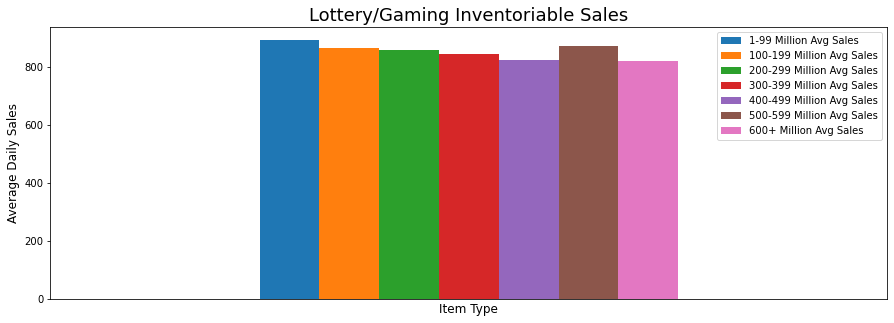

In [41]:
lottery_gaming = merged.loc['LOTTERY/GAMING INVENTORIABLE':'LOTTERY/GAMING INVENTORIABLE']
lottery_gaming.reset_index(inplace=True)
names = ['1-99 Million Avg Sales','100-199 Million Avg Sales','200-299 Million Avg Sales','300-399 Million Avg Sales','400-499 Million Avg Sales','500-599 Million Avg Sales','600+ Million Avg Sales']
lottery_gaming.plot(x='SubCategoryName', y=names,kind="bar", figsize=(15, 5))
plt.xlabel('Item Type',size=12)
plt.ylabel("Average Daily Sales", size=12)
plt.xticks([])
plt.title("Lottery/Gaming Inventoriable Sales", size = 18)
plt.show()

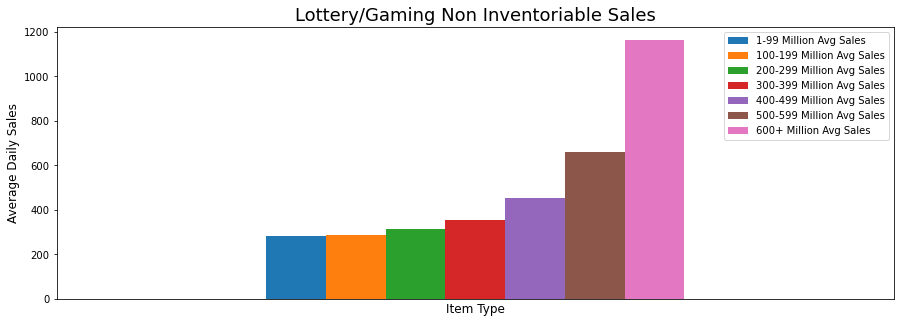

In [42]:
lottery_gaming = merged.loc['LOTTERY/GAMING NON-INVENTORIABLE':'LOTTERY/GAMING NON-INVENTORIABLE']
lottery_gaming.reset_index(inplace=True)
names = ['1-99 Million Avg Sales','100-199 Million Avg Sales','200-299 Million Avg Sales','300-399 Million Avg Sales','400-499 Million Avg Sales','500-599 Million Avg Sales','600+ Million Avg Sales']
lottery_gaming.plot(x='SubCategoryName', y=names,kind="bar", figsize=(15, 5))
plt.xlabel('Item Type',size=12)
plt.ylabel("Average Daily Sales", size=12)
plt.xticks([])
plt.title("Lottery/Gaming Non Inventoriable Sales", size=18)
plt.show()

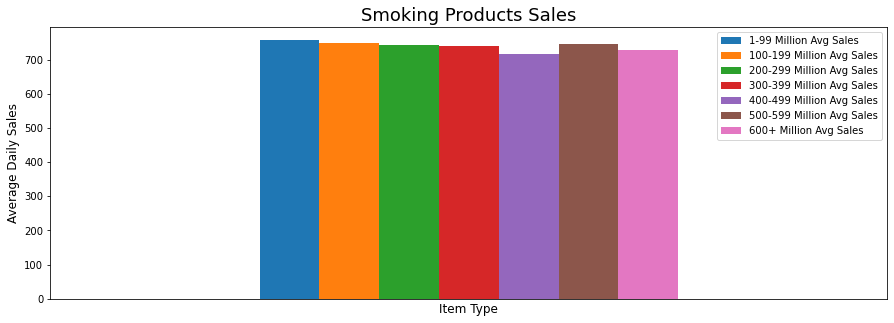

In [43]:
smoking = merged.loc['SMOKING PRODUCTS':'SMOKING PRODUCTS']
smoking.reset_index(inplace=True)
names = ['1-99 Million Avg Sales','100-199 Million Avg Sales','200-299 Million Avg Sales','300-399 Million Avg Sales','400-499 Million Avg Sales','500-599 Million Avg Sales','600+ Million Avg Sales']
smoking.plot(x='SubCategoryName', y=names,kind="bar", figsize=(15, 5))
plt.xlabel('Item Type',size=12)
plt.ylabel("Average Daily Sales", size=12)
plt.xticks([])
plt.title("Smoking Products Sales", size = 18)
plt.show()

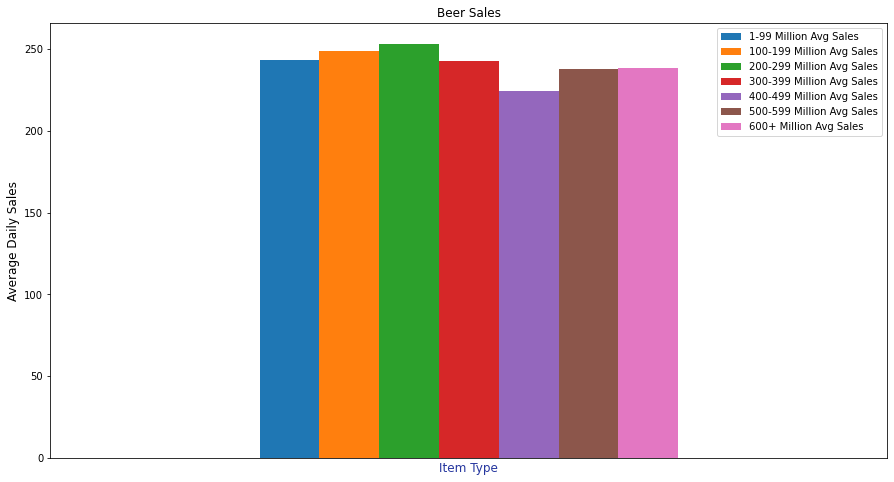

In [44]:
beer = merged.loc['BEER':'BEER']
beer.reset_index(inplace=True)
names = ['1-99 Million Avg Sales','100-199 Million Avg Sales','200-299 Million Avg Sales','300-399 Million Avg Sales','400-499 Million Avg Sales','500-599 Million Avg Sales','600+ Million Avg Sales']
beer.plot(x='SubCategoryName', y=names,kind="bar", figsize=(15, 8))
plt.xlabel('Item Type', color='#26379f',size=12)
plt.ylabel("Average Daily Sales", size=12)
plt.xticks([])
plt.title("Beer Sales")
plt.show()

In [45]:
merged['1-300 Avg Sales'] = (merged['1-99 Million Avg Sales'] + merged['100-199 Million Avg Sales'] + merged['200-299 Million Avg Sales'])/3
merged['400+ Avg Sales'] = (merged['400-499 Million Avg Sales'] + merged['500-599 Million Avg Sales'] + merged['600+ Million Avg Sales'])/3
merged = merged[['1-99 Million Avg Sales','100-199 Million Avg Sales','200-299 Million Avg Sales','300-399 Million Avg Sales','400-499 Million Avg Sales','500-599 Million Avg Sales','600+ Million Avg Sales','1-300 Avg Sales','400+ Avg Sales','500-600+ vs 1-199 Difference','Absolute']]
merged.sort_values('Absolute', ascending=False, inplace=True)
merged.head(10)

,1-99 Million Avg Sales,100-199 Million Avg Sales,200-299 Million Avg Sales,300-399 Million Avg Sales,400-499 Million Avg Sales,500-599 Million Avg Sales,600+ Million Avg Sales,1-300 Avg Sales,400+ Avg Sales,500-600+ vs 1-199 Difference,Absolute
SubCategoryName,,,,,,,,,,,
ALL REGULAR,8898.103059,9418.878891,9442.674978,9754.351540,8478.558563,8580.634405,7092.293311,9253.218976,8050.495426,-2644.054233,2644.054233
LOTTERY/GAMING NON-INVENTORIABLE,281.717136,285.439975,312.165179,353.299822,452.822492,661.721311,1163.455199,293.107430,759.333001,1258.019400,1258.019400
ALL HIGH - GRADE,4443.106356,4649.573972,4675.095480,4791.487407,4281.849890,4373.918631,3785.384945,4589.258603,4147.051155,-933.376752,933.376752
ALL MID - GRADE,2843.049958,2975.660197,2983.697924,3074.081022,2723.127457,2758.292827,2410.927196,2934.136026,2630.782494,-649.490131,649.490131
ALL DIESEL GRADES,1281.673457,1258.927702,1242.399637,1250.020483,1141.457662,1231.250048,992.953053,1261.000266,1121.886921,-316.398058,316.398058
ALL ETHANOL FUELS,1046.107017,1097.376969,1076.480995,1092.202525,964.409241,1049.066296,793.826389,1073.321660,935.767309,-300.591300,300.591300
AUTOMATIC CAR WASH,1071.049832,1094.194377,1177.538204,1046.519653,969.423371,1008.614421,898.629559,1114.260805,958.889117,-258.000229,258.000229
CAR WASH RELATED SERVICES,608.616743,583.699293,645.834714,697.467339,701.402875,743.167500,657.821892,612.716917,700.797422,208.673356,208.673356
HAND CAR WASH,963.209522,991.663184,1013.703411,962.248095,920.411163,920.638125,882.471500,989.525372,907.840263,-151.763081,151.763081


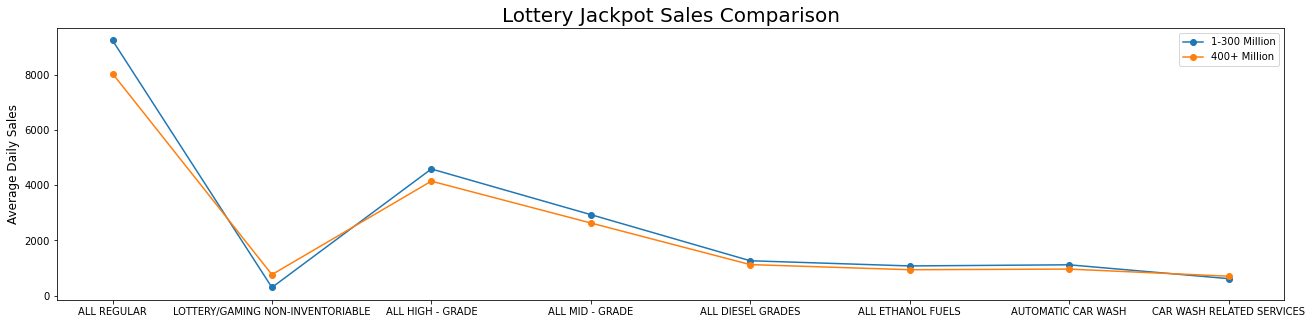

In [46]:
plt.rcParams['figure.figsize'] = [22, 5]
plt.title("Lottery Jackpot Sales Comparison", size=20)
plt.plot(merged.index[0:8], merged['1-300 Avg Sales'][0:8], marker = 'o', label = '1-300 Million')
plt.plot(merged.index[0:8], merged['400+ Avg Sales'][0:8], marker = 'o', label = '400+ Million')
plt.ylabel("Average Daily Sales", size=12)
plt.legend()
plt.show()

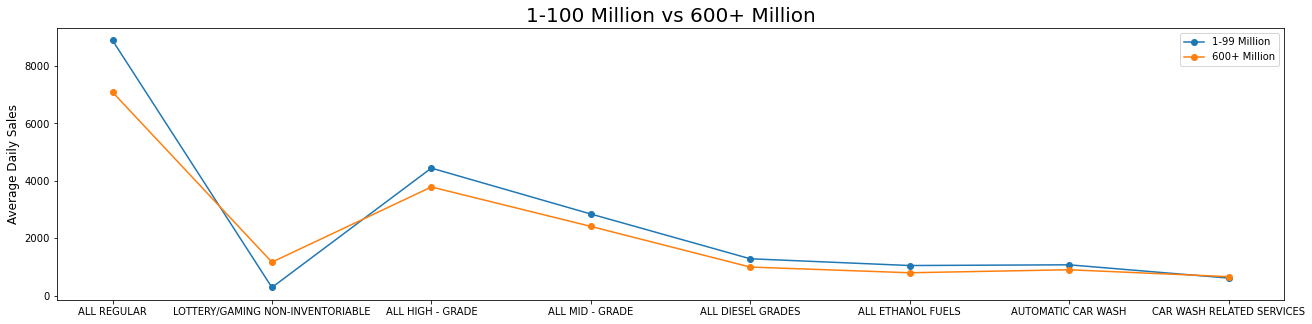

In [47]:
plt.rcParams['figure.figsize'] = [22, 5]
plt.title("1-100 Million vs 600+ Million", size=20)
plt.plot(merged.index[0:8], merged['1-99 Million Avg Sales'][0:8], marker = 'o', label = '1-99 Million')
plt.plot(merged.index[0:8], merged['600+ Million Avg Sales'][0:8], marker = 'o', label = '600+ Million')
plt.ylabel("Average Daily Sales", size=12)
plt.legend()
plt.show()

The "500-600+ vs 1-199 Sales" is the column of focus in this dataframe. It compares the difference in average daily sales between the lowest and highest lottery jackpot sizes in our dataset. This was calculated by adding together the "1-99 Million" and "100-199 Million" columns and subtracting by the combination of the "500-599 Million" and "600+ Million" columns.

The biggest increase of sales as the lottery jackpot increased was **Lottery/Gaming Non-Inventoriable** as it saw a steady increase as the jackpot increased through the dataframe. On average, the sales of this subcategory were \\$1,289.95 higher on lottery jackpot days of over \\$500 Million as opposed to when it was under \\$200 Million.

Out of the 20 subcategories shown, only three subcategories saw an increase as the jackpot increased. Car Wash related services was only an increase of \\$198.74 which could attributed to external factors such as weather. And maintenance/repair only saw an increase of \\$20.82.

In [48]:
del under_100
del mil100
del mil200
del mil300
del mil400
del mil500
del mil600
del merged
gc.collect()

22529

### Daily Item Sales versus Jackpot Size Correlation Analysis

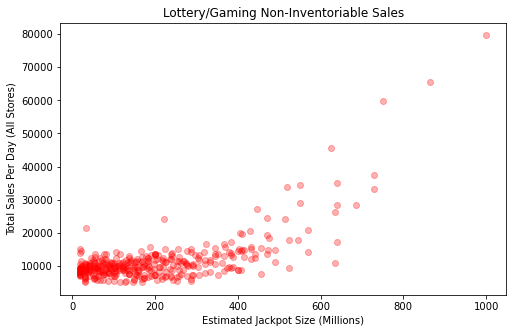

		Correlation: 0.6797123418680776


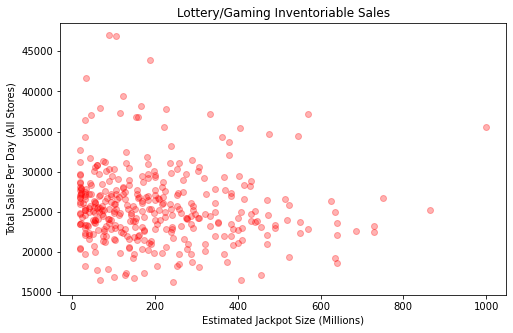

		Correlation: -0.07473652888245397


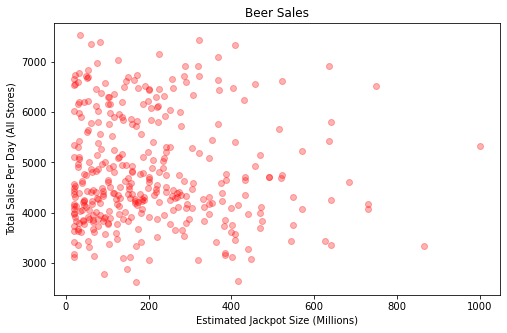

		Correlation: -0.04066874272470113


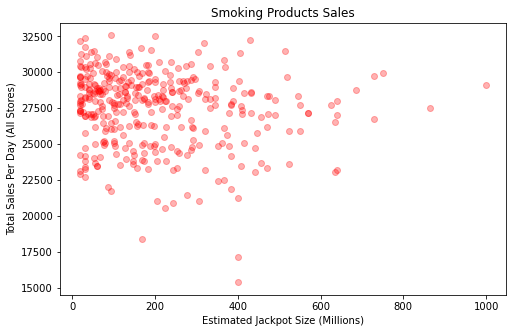

		Correlation: -0.13681245190708746


In [49]:
lottery_noninvent = complete_data[complete_data['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE']
lottery_noninvent = lottery_noninvent.groupby(by=['Date','Estimated Jackpot']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Lottery/Gaming Non-Inventoriable Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Estimated Jackpot Size (Millions)")
plt.scatter(lottery_noninvent["Estimated Jackpot"], lottery_noninvent["TotalSales"], alpha = 0.3, color='red')
plt.show()
print("\t\tCorrelation:",lottery_noninvent['TotalSales'].corr(lottery_noninvent['Estimated Jackpot']))

lottery_invent = complete_data[complete_data['SubCategoryName'] == 'LOTTERY/GAMING INVENTORIABLE']
lottery_invent = lottery_invent.groupby(by=['Date','Estimated Jackpot']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Lottery/Gaming Inventoriable Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Estimated Jackpot Size (Millions)")
plt.scatter(lottery_invent["Estimated Jackpot"], lottery_invent["TotalSales"], alpha = 0.3, color='red')
plt.show()
print("\t\tCorrelation:",lottery_invent['TotalSales'].corr(lottery_invent['Estimated Jackpot']))

beer = complete_data[complete_data['SubCategoryName'] == 'BEER']
beer = beer.groupby(by=['Date','Estimated Jackpot']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Beer Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Estimated Jackpot Size (Millions)")
plt.scatter(beer["Estimated Jackpot"], beer["TotalSales"], alpha = 0.3, color='red')
plt.show()
print("\t\tCorrelation:",beer['TotalSales'].corr(beer['Estimated Jackpot']))

smoking = complete_data[complete_data['SubCategoryName'] == 'SMOKING PRODUCTS']
smoking = smoking.groupby(by=['Date','Estimated Jackpot']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Smoking Products Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Estimated Jackpot Size (Millions)")
plt.scatter(smoking["Estimated Jackpot"], smoking["TotalSales"], alpha = 0.3, color='red')
plt.show()
print("\t\tCorrelation:",smoking['TotalSales'].corr(smoking['Estimated Jackpot']))

In [50]:
complete_data[(complete_data['Date'] == '2021-01-22') & (complete_data['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE')]['TotalSales'].sum()

79594.0

With correlation, a strong relationship between two variables is a Pearson Correlation Coefficient (r) of 0.75 >= r <= 1. A value between 0.5 and 0.75 is considered a moderate to strong relationship between two variables. With the four scatter plots above, **Lottery/Gaming Inventoriable**, **Beer** and **Smoking Products** exhibited r <= 0.25 relationship with Estimated Jackpot size which indicates there is no relationship. **Lottery/Gaming Non-Inventoriable** has a 0.679 value which indicates a strong relationship between lottery ticket sales and increased Estimated Jackpot size. 

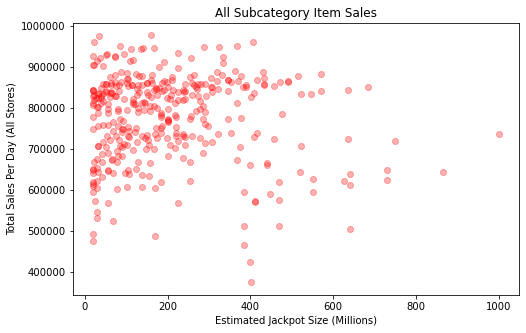

		Correlation: -0.08854796227838851


In [51]:
total_sales = complete_data.copy()
total_sales = total_sales.groupby(by=['Date','Estimated Jackpot']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("All Subcategory Item Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Estimated Jackpot Size (Millions)")
plt.scatter(total_sales['Estimated Jackpot'], total_sales["TotalSales"], alpha = 0.3, color = 'red')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #Remove Scientific Notation
plt.show()
print("\t\tCorrelation:",total_sales['TotalSales'].corr(total_sales['Estimated Jackpot']))

In [52]:
# Calculate Average Correlation
print("Total Correlation:",complete_data['TotalSales'].corr(complete_data['Estimated Jackpot']))

Total Correlation: -0.002947593018017627


If we generalize to all daily sales, the correlation is significantly low signaling *no relationship* between overall daily sales and the Jackpot size. 

## Powerball and Mega Millions Lottery Size Average Analysis
#### Average Daily Sales for All Stores

Lastly for this section, instead of taking the lottery size of the given day, we will compute the *average of both Powerball and Mega Millions* and evaluate. In the previous sections, if it was a Monday, Wednesday or Saturday, we would use the Powerball lottery as the "Estimated Jackpot" as an example. So if the Mega Millions was a high lottery amount, the estimated jackpot would still have been the lower Powerball amount and vice versa. With the lottery average, we will recalculate the correlations and check several subcategories to evaluate if this change will make a difference. 

In [53]:
under_100 = complete_data[(complete_data['Lottery Average'] >= 1) & (complete_data['Lottery Average'] < 100)]
under_100 = under_100.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
under_100.rename(columns={'TotalSales':'1-99 Million Avg Sales'}, inplace=True)
# under_100.sort_values(by = '1-99 Million Avg Sales', ascending=False).head(10)

mil100 = complete_data[(complete_data['Lottery Average'] >= 100) & (complete_data['Lottery Average'] < 200)]
mil100 = mil100.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil100.rename(columns={'TotalSales':'100-199 Million Avg Sales'}, inplace=True)
# mil100.sort_values(by = '100-199 Million Avg Sales', ascending=False).head(10)

mil200 = complete_data[(complete_data['Lottery Average'] >= 200) & (complete_data['Lottery Average'] < 300)]
mil200 = mil200.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil200.rename(columns={'TotalSales':'200-299 Million Avg Sales'}, inplace=True)
# mil200.sort_values(by = '200-299 Million Avg Sales', ascending=False).head(10)

mil300 = complete_data[(complete_data['Lottery Average'] >= 300) & (complete_data['Lottery Average'] < 400)]
mil300 = mil300.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil300.rename(columns={'TotalSales':'300-399 Million Avg Sales'}, inplace=True)
# mil300.sort_values(by = '300-399 Million Avg Sales', ascending=False).head(10)

mil400 = complete_data[(complete_data['Lottery Average'] > 399) & (complete_data['Lottery Average'] < 500)]
mil400 = mil400.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil400.rename(columns={'TotalSales':'400-499 Million Avg Sales'}, inplace=True)
# mil400.sort_values(by = '400-499 Million Avg Sales', ascending=False).head(10)

mil500 = complete_data[(complete_data['Lottery Average'] > 499) & (complete_data['Lottery Average'] < 600)]
mil500 = mil500.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil500.rename(columns={'TotalSales':'500-599 Million Avg Sales'}, inplace=True)
# mil500.sort_values(by = '500-599 Million Avg Sales', ascending=False).head(10)

mil600 = complete_data[(complete_data['Lottery Average'] > 599)]
mil600 = mil600.groupby(by='SubCategoryName').agg({'TotalSales':'mean'}).reset_index()
mil600.rename(columns={'TotalSales':'600+ Million Avg Sales'}, inplace=True)
# mil600.sort_values(by = '600+ Million Avg Sales', ascending=False).head(10)

# Average Daily Sales among all stores
merged = under_100.merge(mil100, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil200, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil300, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil400, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil500, on = 'SubCategoryName', how = 'left')
merged = merged.merge(mil600, on = 'SubCategoryName', how = 'left')
merged.set_index('SubCategoryName', inplace=True)
merged.fillna(0, inplace=True)
merged['500-600+ vs 1-199 Difference'] =  (merged['500-599 Million Avg Sales'] + merged['600+ Million Avg Sales']) - (merged['1-99 Million Avg Sales'] + merged['100-199 Million Avg Sales'])
merged['Absolute'] = abs(merged['500-600+ vs 1-199 Difference']) 

columns = ['LOTTERY/GAMING NON-INVENTORIABLE','LOTTERY/GAMING INVENTORIABLE', 'BEER','SMOKING PRODUCTS','ENERGY DRINK BEVERAGES', 'ALL REGULAR']

merged[merged.index.isin(columns)].sort_values(by='Absolute', ascending=False)

,1-99 Million Avg Sales,100-199 Million Avg Sales,200-299 Million Avg Sales,300-399 Million Avg Sales,400-499 Million Avg Sales,500-599 Million Avg Sales,600+ Million Avg Sales,500-600+ vs 1-199 Difference,Absolute
SubCategoryName,,,,,,,,,
ALL REGULAR,8895.052852,9354.312390,9918.527771,9019.498548,8425.943821,6007.520307,6412.408586,-5829.436349,5829.436349
LOTTERY/GAMING NON-INVENTORIABLE,269.434608,286.854872,348.060391,406.171408,510.764706,669.636364,1349.284053,1462.630937,1462.630937
SMOKING PRODUCTS,751.459948,751.788411,747.457365,731.963238,740.901981,678.435219,727.932007,-96.881133,96.881133
LOTTERY/GAMING INVENTORIABLE,868.269925,876.418574,879.976229,849.848666,802.408932,805.954286,847.921416,-90.812798,90.812798
BEER,242.987443,251.683225,246.614369,245.204077,226.115693,186.357500,230.422313,-77.890855,77.890855
ENERGY DRINK BEVERAGES,180.166917,183.852075,187.561780,176.045097,176.775377,141.808596,162.721480,-59.488915,59.488915


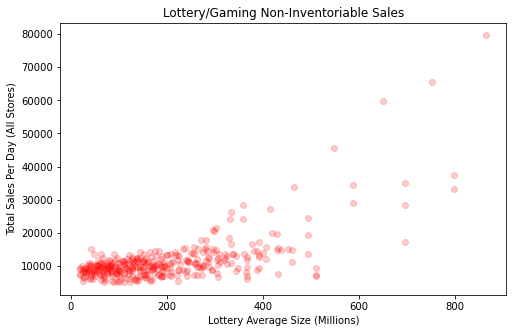

		Correlation: 0.6778920794905828


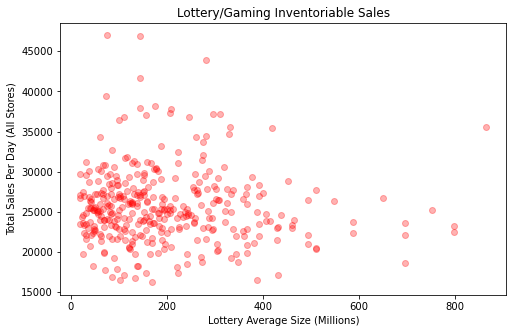

		Correlation: -0.053170189414491344


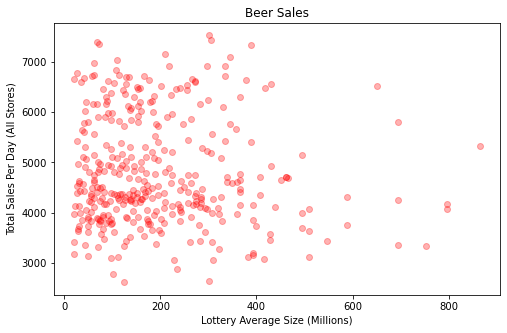

		Correlation: -0.07117786738107337


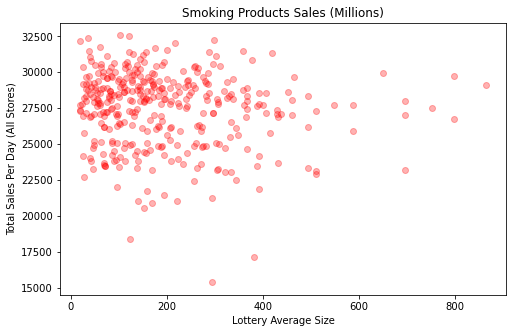

		Correlation: -0.10970240477846838


In [54]:
lottery_noninvent = complete_data[complete_data['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE']
lottery_noninvent = lottery_noninvent.groupby(by=['Date','Lottery Average']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Lottery/Gaming Non-Inventoriable Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Lottery Average Size (Millions)")
plt.scatter(lottery_noninvent["Lottery Average"], lottery_noninvent["TotalSales"], alpha = 0.2, color='red')
plt.show()
print("\t\tCorrelation:",lottery_noninvent['TotalSales'].corr(lottery_noninvent['Lottery Average']))

lottery_invent = complete_data[complete_data['SubCategoryName'] == 'LOTTERY/GAMING INVENTORIABLE']
lottery_invent = lottery_invent.groupby(by=['Date','Lottery Average']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Lottery/Gaming Inventoriable Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Lottery Average Size (Millions)")
plt.scatter(lottery_invent["Lottery Average"], lottery_invent["TotalSales"], alpha = 0.3, color='red')
plt.show()
print("\t\tCorrelation:",lottery_invent['TotalSales'].corr(lottery_invent['Lottery Average']))

beer = complete_data[complete_data['SubCategoryName'] == 'BEER']
beer = beer.groupby(by=['Date','Lottery Average']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Beer Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Lottery Average Size (Millions)")
plt.scatter(beer["Lottery Average"], beer["TotalSales"], alpha = 0.3, color='red')
plt.show()
print("\t\tCorrelation:",beer['TotalSales'].corr(beer['Lottery Average']))

smoking = complete_data[complete_data['SubCategoryName'] == 'SMOKING PRODUCTS']
smoking = smoking.groupby(by=['Date','Lottery Average']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Smoking Products Sales (Millions)")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Lottery Average Size")
plt.scatter(smoking["Lottery Average"], smoking["TotalSales"], alpha = 0.3, color='red')
plt.show()
print("\t\tCorrelation:",smoking['TotalSales'].corr(smoking['Lottery Average']))

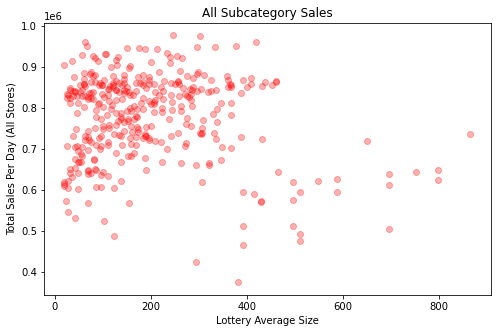

		Correlation: -0.16585195599674327


In [55]:
total_sales = complete_data.copy()
total_sales = total_sales.groupby(by=['Date','Lottery Average']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("All Subcategory Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Lottery Average Size")
plt.scatter(total_sales['Lottery Average'], total_sales["TotalSales"], alpha = 0.3, color = 'red')
plt.show()
print("\t\tCorrelation:",total_sales['TotalSales'].corr(total_sales['Lottery Average']))

By incorporating the lottery average, we were able to find that sales with Lottery/Gaming Non-Inventoriable, Lottery/Gaming Inventoriable, Beer and Smoking Products were all even less correlated to the lottery size average than the lottery size for the lottery being drawn that day.

Notes:
- Lottery/Gaming Non-Inventoriable correlation coefficient slightly changed from 0.6797 (Estimated Jackpot) to 0.6779 (Lottery Average). This means that the lottery size for the drawing on that day is very slightly more indicitative of sales than the average of the two lottery sizes.
- Lottery/Gaming Inventoriable correlation coefficient decreased from -0.074 (Estimated Jackpot) to -0.053 (Lottery Average). However, both suggest that there is no relationship between sales and lottery jackpot size. 
- Beer correlation coefficient increased from -0.04 (Estimated Jackpot) to -0.07 (Lottery Average). 
- Smoking Products correlation coefficent decreased from -0.1368 (Estimated Jackpot) to -0.1097 (Lottery Average). 
- Total Sales of all items did show a more significant correlation coefficient change of -0.0885 (Estimated Jackpot) to -0.1659 (Lottery Average). In general, sales did seem to have more of a relationship with the lottery average as opposed to only the lottery being drawn on a given day. While this increase is interesting, a correlation coefficient of -0.1659 is considered a zero to very weak relationship between two variables. 

# Post-Lottery Winnings Sales Analysis

For this section, we wanted to evaluate if there was any deviation in sales based on Jackpot winnings. In 2021, there was 13 jackpot winners combined between both Mega Millions and Powerball. In general, the number of days since a winner is very correlated with the size of the jackpot so we would expect simliar results as the jackpot size analysis. 

In [56]:
jackpot_winning_dates = [datetime.datetime(2020,9,15), datetime.datetime(2021,1,20), datetime.datetime(2021,1,22), datetime.datetime(2021,1,23), datetime.datetime(2021,1,30), datetime.datetime(2021,2,16), datetime.datetime(2021,3,27), datetime.datetime(2021,5,21), datetime.datetime(2021,6,5), datetime.datetime(2021,6,18), datetime.datetime(2021,9,21), datetime.datetime(2021,10,4), datetime.datetime(2021,10,22)]

def days_since_last_winner(row):
    # Find which date is greater than the current date, if none, use last date
    # Return 0 if same date, return days later than the previous date otherwise
    
    i = 0
    for day in jackpot_winning_dates:
        if row < day:
            return (row - jackpot_winning_dates[i-1]).days
        else:
            i = i + 1
    return (row - jackpot_winning_dates[i-1]).days

In [57]:
complete_data['Days Since Jackpot Winning'] = complete_data['Date'].apply(days_since_last_winner)
# complete_data.tail()

With Lottery/Gaming Non-Inventoriable sales, it is important to note that the size of the jackpot and the number of days since there was a winner are directly correlated to one another. So, it is not a surprise that there is a slight positive correlation as the number of days pass without a winner that sales of lottery tickets may increase as the jackpot size increases.

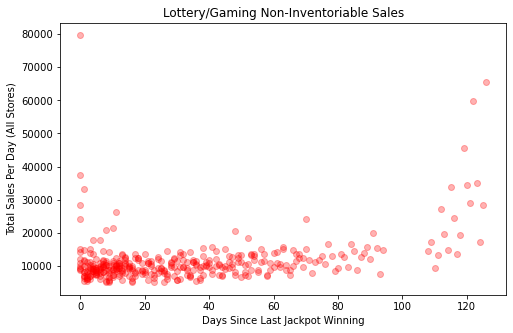

		Correlation: 0.3850555620185006


In [58]:
lottery_noninvent = complete_data[complete_data['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE']
lottery_noninvent = lottery_noninvent.groupby(by=['Date','Days Since Jackpot Winning']).agg({'TotalSales':'sum'}).reset_index()
plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Lottery/Gaming Non-Inventoriable Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Days Since Last Jackpot Winning")
plt.scatter(lottery_noninvent["Days Since Jackpot Winning"], lottery_noninvent["TotalSales"], alpha = 0.3, color = 'red')
plt.show()
print("\t\tCorrelation:",lottery_noninvent['TotalSales'].corr(lottery_noninvent['Days Since Jackpot Winning']))

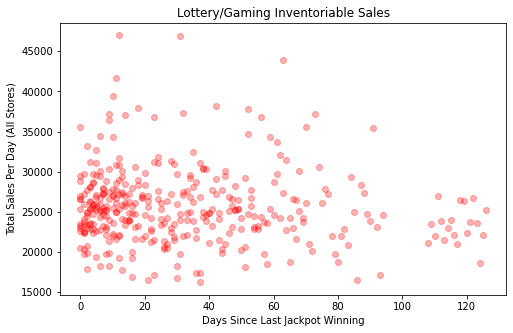

		Correlation: -0.09009928685724856


In [59]:
lottery_invent = complete_data[complete_data['SubCategoryName'] == 'LOTTERY/GAMING INVENTORIABLE']
lottery_invent = lottery_invent.groupby(by=['Date','Days Since Jackpot Winning']).agg({'TotalSales':'sum'}).reset_index()

plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Lottery/Gaming Inventoriable Sales")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Days Since Last Jackpot Winning")
plt.scatter(lottery_invent["Days Since Jackpot Winning"], lottery_invent["TotalSales"], alpha = 0.3, color = 'red')
plt.show()
print("\t\tCorrelation:",lottery_invent['TotalSales'].corr(lottery_invent['Days Since Jackpot Winning']))

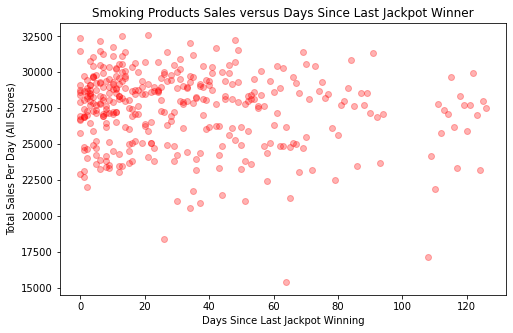

Correlation: -0.13940039708769283


In [60]:
smoking = complete_data[complete_data['SubCategoryName'] == 'SMOKING PRODUCTS']
smoking = smoking.groupby(by=['Date','Days Since Jackpot Winning']).agg({'TotalSales':'sum'}).reset_index()
plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Smoking Products Sales versus Days Since Last Jackpot Winner")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Days Since Last Jackpot Winning")
plt.scatter(smoking["Days Since Jackpot Winning"], smoking["TotalSales"], alpha = 0.3, color = 'red')
plt.show()
print("Correlation:",smoking['TotalSales'].corr(smoking['Days Since Jackpot Winning']))

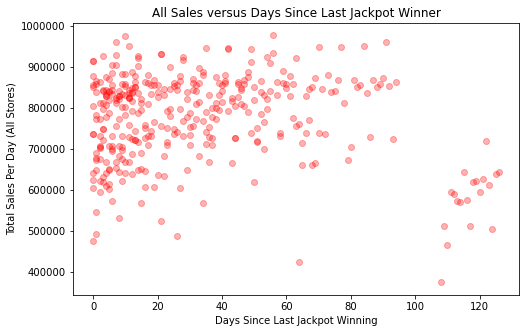

Correlation: -0.11607227533593689


In [61]:
total_sales = complete_data.copy()
total_sales = total_sales.groupby(by=['Date','Days Since Jackpot Winning']).agg({'TotalSales':'sum'}).reset_index()
plt.rcParams['figure.figsize'] = [8, 5]
plt.title("All Sales versus Days Since Last Jackpot Winner")
plt.ylabel("Total Sales Per Day (All Stores)")
plt.xlabel("Days Since Last Jackpot Winning")
plt.scatter(total_sales["Days Since Jackpot Winning"], total_sales["TotalSales"], alpha = 0.3, color = 'red')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #Remove Scientific Notation
plt.show()
print("Correlation:",total_sales['TotalSales'].corr(total_sales['Days Since Jackpot Winning']))

Much like jackpot size, the sales of items such as smoking products and beer did not exhibit a relationship between sales and days since a jackpot winning. Lottery/Gaming Non-Inventoriable had a correlation coefficient of 0.38 which indicates a weak correlation, which is significantly lower than the correlation coefficient of 0.68 with estimated jackpot size and the average size of both lotteries. 

In [62]:
# Clean space
del lottery_invent
del smoking
del beer
del lottery_noninvent
del total_sales
gc.collect()

12698

## Holiday Sales vs Normal Sales Analysis

In [63]:
holidays = complete_data[complete_data['IsHoliday'] == 1].groupby(['SubCategoryName']).agg({'TotalSales':'mean'}).reset_index()
normal = complete_data[complete_data['IsHoliday'] == 0].groupby(['SubCategoryName']).agg({'TotalSales':'mean'}).reset_index()
tmp = holidays.merge(normal, on = 'SubCategoryName')
tmp.rename(columns = {'TotalSales_x':'Holiday Avg Sales', 'TotalSales_y':'Normal Avg Sales'}, inplace=True)
tmp = tmp.groupby('SubCategoryName').agg({'Holiday Avg Sales':'first', 'Normal Avg Sales':'first'})
tmp['Difference'] = abs(tmp['Normal Avg Sales'] - tmp['Holiday Avg Sales'])
tmp.sort_values(by = ['Difference'], ascending=False, inplace=True)
tmp.head(15)

,Holiday Avg Sales,Normal Avg Sales,Difference
SubCategoryName,,,
ALL REGULAR,7393.290068,9169.466133,1776.176064
ALL HIGH - GRADE,3935.664966,4555.391413,619.726447
ALL DIESEL GRADES,762.169811,1260.147142,497.977331
ALL MID - GRADE,2464.666142,2913.399569,448.733428
ALL ETHANOL FUELS,891.365294,1060.475979,169.110685
AUTOMATIC CAR WASH,918.481157,1085.545076,167.063919
QSR PRODUCTS AND SERVICES,185.534583,296.084673,110.550089
LOTTERY/GAMING INVENTORIABLE,765.954674,869.606747,103.652072
SMOKING PRODUCTS,651.067483,749.471541,98.404058


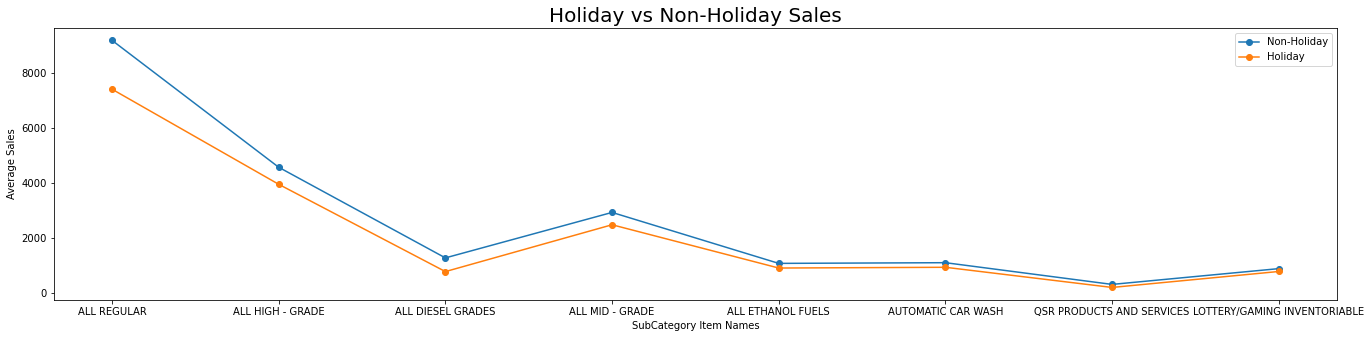

In [64]:
plt.rcParams['figure.figsize'] = [23, 5]
plt.xlabel("SubCategory Item Names")
plt.ylabel("Average Sales")
plt.title("Holiday vs Non-Holiday Sales", size=20)
plt.plot(tmp.index[0:8], tmp['Normal Avg Sales'][0:8], marker = 'o', label='Non-Holiday')
plt.plot(tmp.index[0:8], tmp['Holiday Avg Sales'][0:8], marker = 'o', label='Holiday')
plt.legend()
plt.show()

In [65]:
del tmp
del complete_data
gc.collect()

3424

In [68]:
gc.collect()

0

## Calculate Basket DataFrame
Strategically placed this section here to reduce MemoryError at a given period of time.

In [69]:
basket_data = pd.read_csv("basketdataset.csv")
basket_data['Date'] = pd.to_datetime(basket_data['Date'])
basket_data

,FranchiseID,TransactionID,CenterName,City,StateProvince,ZipPostalCode,CarWash,StoreHours,StoreSize,CategoryName,...,IsWeekend,IsHoliday,Date,TransactionTimeStamp,TotalSales,TotalQuantity,Market,AreaRegion,County,RoyaltySegment
0,5452,100026241.0,Kodka Inc.,Newport beach,California,92663,Yes,5AM - 12AM,Medium (1000-1500 sq ft),MOTOR FUEL,...,0,1,2021-01-01,2021-01-01 00:00:37.000,20.00,5.88,Southern California,LA Basin,Orange,NaN
1,5011,100065442.0,Orange Car Wash Inc,Orange,California,92868,Yes,24 Hours,Small (500-1000 sq ft),MOTOR FUEL,...,0,1,2021-01-01,2021-01-01 00:00:50.000,21.05,6.30,Southern California,LA Basin,Orange,NaN
2,5121,100027332.0,Bahram Kasravi,Wilmington,California,90744,No,24 Hours,Medium (1000-1500 sq ft),MOTOR FUEL,...,0,1,2021-01-01,2021-01-01 00:00:57.000,25.06,7.59,Southern California,LA Basin,Los Angeles,NaN
3,5002,100034932.0,Hamid Zerehi.,Harbor City,California,90710,No,24 Hours,Small (500-1000 sq ft),MOTOR FUEL,...,0,1,2021-01-01,2021-01-01 00:01:57.000,27.65,8.23,Southern California,LA Basin,Los Angeles,NaN
4,5346,2139.0,"E & H, Inc.",Anaheim,California,92804,No,24 Hours,Medium (1000-1500 sq ft),CONTAINER FEES,...,0,1,2021-01-01,2021-01-01 00:02:02.000,0.10,1.00,Southern California,LA Basin,Orange,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17967876,5239,0.0,"Wpp, Inc.",Long Beach,California,90815,No,24 Hours,Medium (1000-1500 sq ft),LOTTERY/GAMING,...,0,0,2021-12-31,2021-12-31 23:59:00.000,0.00,-293.00,Southern California,LA Basin,Los Angeles,NaN
17967877,5121,0.0,Bahram Kasravi,Wilmington,California,90744,No,24 Hours,Medium (1000-1500 sq ft),LOTTERY/GAMING,...,0,0,2021-12-31,2021-12-31 23:59:00.000,20.00,20.00,Southern California,LA Basin,Los Angeles,NaN
17967878,5372,15271.0,Mohsen Ghaneian,Orange,California,92868,No,24 Hours,Small (500-1000 sq ft),CANDY/CONFECTION,...,0,0,2021-12-31,2021-12-31 23:59:15.000,2.49,1.00,Southern California,LA Basin,Orange,NaN
17967879,5383,10002496.0,"Hosn Ventures, Inc.",Diamond Bar,California,91765,No,24 Hours,Medium (1000-1500 sq ft),MOTOR FUEL,...,0,0,2021-12-31,2021-12-31 23:59:17.000,12.47,2.41,Southern California,LA Basin,Los Angeles,NaN


In [70]:
%%time
basket_data = basket_data.merge(lottery_dates, on = 'Date', how = 'left')
del lottery_dates
gc.collect()

Wall time: 2min 21s


0

In [71]:
basket_data.sort_values(by=['Date','TransactionID'], ascending=True, inplace=True)
basket_data['Estimated Jackpot'] = basket_data['Estimated Jackpot'].fillna(method='ffill')
basket_data['Estimated Jackpot'] = basket_data['Estimated Jackpot'].astype(str)
basket_data['Estimated Jackpot'] = basket_data['Estimated Jackpot'].apply(lambda x: x.replace('$',''))
basket_data['Estimated Jackpot'] = basket_data['Estimated Jackpot'].apply(lambda x: x.replace('Million',''))
basket_data['Estimated Jackpot'] = basket_data['Estimated Jackpot'].apply(lambda x: int(x.replace('Billion','')) * 1000 if x.find("Billion") != -1 else x)
basket_data['Estimated Jackpot'] = basket_data['Estimated Jackpot'].apply(lambda x: int(x))

In [72]:
%%time
basket_data['Powerball'] = basket_data.apply(lambda x: x['Estimated Jackpot'] if x['Lottery'] == 'Powerball' else np.nan, axis=1)
basket_data['Mega Millions'] = basket_data.apply(lambda x: x['Estimated Jackpot'] if x['Lottery'] == 'Mega Millions' else np.nan, axis=1)
basket_data['Powerball'] = basket_data['Powerball'].fillna(method='ffill')
basket_data['Mega Millions'] = basket_data['Mega Millions'].fillna(method='ffill')

# Fix Jan 1st missing Powerball
basket_data.loc[basket_data['Date'] == '2021-01-01', 'Powerball'] = 363

basket_data['Lottery Average'] = (basket_data['Powerball'] + basket_data['Mega Millions']) / 2

Wall time: 21min 56s


In [73]:
%%time
basket_data.insert(loc=0, column='BasketID', value = basket_data.set_index(['TransactionID','FranchiseID','TransactionTimeStamp']).index.factorize()[0]+1)

Wall time: 2min 47s


#### Lottery/Gaming Non-Inventoriable WeekDay Sales Trends

Last for this section, we have seen that Lottery/Gaming Non-Inventoriable has shown a steady increase as the jackpot sales increase. Does this trend span across all weekdays? Or is it specific to certain days or holidays?

In [74]:
weekday_baskets = basket_data[['BasketID','TransactionID','FranchiseID','SubCategoryName','TransactionTimeStamp','WeekDayName','TotalSales','TotalQuantity','County','Lottery','Estimated Jackpot']]
basket_invent_ids = weekday_baskets[weekday_baskets['SubCategoryName'] == 'LOTTERY/GAMING INVENTORIABLE']['BasketID'].tolist()
weekday_baskets = weekday_baskets.groupby(['BasketID','SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum','County':'first','Lottery':'first','Estimated Jackpot':'first', 'TransactionTimeStamp':'first', 'WeekDayName':'first', 'FranchiseID':'first'}).reset_index()
weekday_baskets = weekday_baskets[(weekday_baskets['BasketID'].isin(basket_invent_ids))]
weekday_baskets['Estimated Jackpot'] = (weekday_baskets['Estimated Jackpot'] / 100).astype(int) *100

weekday_noninv_baskets = weekday_baskets[weekday_baskets['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE'].groupby(['SubCategoryName','WeekDayName','Estimated Jackpot']).agg({'TotalSales':'mean','TotalQuantity':'mean'})
weekday_noninv_baskets.rename(columns = {'TotalSales':'AvgSales', 'TotalQuantity':'AvgQuantity'})
weekday_noninv_baskets

TotalSales  \
SubCategoryName                  WeekDayName Estimated Jackpot               
LOTTERY/GAMING NON-INVENTORIABLE Friday      0                    9.692308   
                                             100                 10.191502   
                                             200                 10.162140   
                                             300                 10.367576   
                                             400                  9.787575   
                                             500                 10.734818   
                                             700                 12.841176   
                                             1000                10.784416   
                                 Monday      0                   10.370570   
                                             100                 10.219681   
                                             200                  9.798555   
                                             300                 10.128060   
                                             400                 11.023297   
                                             500                 10.234568   
                                             600                 10.455357   
                                 Saturday    0                    9.326660   
                                             100                  8.875582   
                                             200                  8.963720   
                                             300                  9.773890   
                                             400                 10.975439   
                                             500                  9.897959   
                                             600                 10.248408   
                                 Sunday      0                    8.988065   
                                             100                  9.070114   
                                             200                 10.076720   
                                             300                  9.932735   
                                             400                  9.371274   
                                             500                  8.806122   
                                             600                  9.586854   
                                 Thursday    0                    9.931604   
                                             100                  9.883923   
                                             200                  9.151543   
                                             300                 10.624521   
                                             400                  9.297030   
                                             500                  9.532258   
                                             700                  9.509091   
                                 Tuesday     0                    9.247650   
                                             100                  9.601920   
                                             200                  9.618857   
                                             300                  9.691571   
                                             400                 10.017784   
                                             600                 10.911864   
                                             800                 13.077441   
                                 Wednesday   0                    9.211473   
                                             100                  9.339205   
                                             200                  9.788194   
                                             300                 10.077728   
                                             400                 10.371118   
                                             500                  9.877108   
                                             700                  9.957529   

       

As shown above, most weekdays exhibited a similar trend to what we have seen throughout this analysis. The average Lottery/Gaming Non-Inventoriable sales tend to increase as the lottery size increases. **Tuesday, Friday and Saturday showed the greatest increase in nearly \\$1-\\$2 in sales per basket**. Thursday and Sunday, ironically the two dates where there isn't a lottery drawing, showed very minimal change in sales in comparison to Tuesday, Friday and Saturday on average. 

In [77]:
# Clear space
del weekday_baskets
gc.collect()

17

## Customer Basket Analysis

The purpose of this final section is to evaluate the most common purchases that are associated with Lottery/Gaming Non-Inventoriable sales. With this section, we will evaluate commonalities amongst customer baskets in which a Lottery/Gaming Non-Inventoriable item was sold. In terms of Lottery Jackpot size, do other items should a similar increase as the jackpot increases?

In [114]:
individual_baskets = basket_data[['BasketID','TransactionID','FranchiseID','SubCategoryName','TransactionTimeStamp','TotalSales','TotalQuantity','County','Lottery','Estimated Jackpot']]
basket_ids = individual_baskets[individual_baskets['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE']['BasketID'].tolist()
individual_baskets = individual_baskets.groupby(['BasketID','SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum','County':'first','Lottery':'first','Estimated Jackpot':'first', 'TransactionTimeStamp':'first', 'FranchiseID':'first'}).reset_index()
individual_baskets = individual_baskets[(individual_baskets['BasketID'].isin(basket_ids))]

# Round Estimated Jackpot to nearest floor 100 value (Ex. 492 would be 400)
individual_baskets['Estimated Jackpot'] = (individual_baskets['Estimated Jackpot'] / 100).astype(int) *100

# Basket Count
baskets_0   = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 0]['BasketID']))
baskets_100 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 100]['BasketID']))
baskets_200 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 200]['BasketID']))
baskets_300 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 300]['BasketID']))
baskets_400 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 400]['BasketID']))
baskets_500 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 500]['BasketID']))
baskets_600 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 600]['BasketID']))
baskets_700 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 700]['BasketID']))
baskets_800 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 800]['BasketID']))
baskets_900 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 900]['BasketID']))
baskets_1000 = len(np.unique(individual_baskets[individual_baskets['Estimated Jackpot'] == 1000]['BasketID']))

individual_baskets.sort_values(by = ['BasketID'], inplace=True)
individual_baskets

,BasketID,SubCategoryName,TotalSales,TotalQuantity,County,Lottery,Estimated Jackpot,TransactionTimeStamp,FranchiseID
0,1,LOTTERY/GAMING NON-INVENTORIABLE,0.00,101.0,Orange,Mega Millions,400,2021-01-01 23:59:00.000,5356
1,2,LOTTERY/GAMING NON-INVENTORIABLE,-6.00,-6.0,Los Angeles,Mega Millions,400,2021-01-01 23:59:00.000,5383
2,3,LOTTERY/GAMING NON-INVENTORIABLE,-1.00,-1.0,Los Angeles,Mega Millions,400,2021-01-01 23:59:00.000,5421
3,4,LOTTERY/GAMING NON-INVENTORIABLE,3.00,-407.0,Orange,Mega Millions,400,2021-01-01 23:59:00.000,5372
4,5,LOTTERY/GAMING NON-INVENTORIABLE,0.00,53.0,Los Angeles,Mega Millions,400,2021-01-01 23:59:00.000,5004
...,...,...,...,...,...,...,...,...,...
14780433,9861569,FRUIT/NUT/SEED,2.59,1.0,Orange,Mega Millions,200,2021-12-31 18:33:01.000,5409
14780434,9861569,LOTTERY/GAMING NON-INVENTORIABLE,6.00,6.0,Orange,Mega Millions,200,2021-12-31 18:33:01.000,5409
14780431,9861569,BOTTLE DEPOSITS/RECYCLE FEE,0.20,2.0,Orange,Mega Millions,200,2021-12-31 18:33:01.000,5409
14780432,9861569,BOTTLED WATER,5.58,2.0,Orange,Mega Millions,200,2021-12-31 18:33:01.000,5409


### Most Common Items purchased with Lottery/Gaming Non-Inventoriable Sales

In the Dataframe below, these are the most common items sold amongst the 414,368 baskets in which a Lottery/Gaming Non-Inventoriable purchase was made. The "Percentage of All Baskets" column represents how often each SubCategory appeared in each basket. Lottery/Gaming Non-Inventoriable is 100% because we have chosen to only look at baskets containing those purchases. 

Key Takeaways:
- **Lottery/Gaming Inventoriable** (Ex. Scratchoffs) only appeared in 11% of all sales that included Non-Inventoriable Tickets
- **Smoking Products** only appeared in 4% of these sales, **Energy Drink Beverages** appeared in 2% of these sales, **Beer** only appeared in 1% of these sales. 

In [115]:
grouped_baskets = individual_baskets.groupby(['SubCategoryName']).agg({'TotalSales':'mean', 'TotalQuantity':'mean','FranchiseID':'count'})
grouped_baskets.rename(columns={'FranchiseID':'TotalCount', 'TotalSales':'AverageSales','TotalQuantity':'AverageQuantity'}, inplace=True)
grouped_baskets['Percentage of All Baskets'] = round(grouped_baskets['TotalCount'] / len(np.unique(basket_ids)),3)
grouped_baskets.sort_values(['TotalCount','SubCategoryName'], ascending=False).head(20)

,AverageSales,AverageQuantity,TotalCount,Percentage of All Baskets
SubCategoryName,,,,
LOTTERY/GAMING NON-INVENTORIABLE,10.181040,7.441277,414368,1.000
LOTTERY/GAMING INVENTORIABLE,16.795352,2.306853,45908,0.111
BOTTLE DEPOSITS/RECYCLE FEE,0.125737,1.969536,33121,0.080
SMOKING PRODUCTS,14.217376,2.463535,17496,0.042
ALL REGULAR,27.071439,6.408689,11897,0.029
ENERGY DRINK BEVERAGES,4.096982,1.552466,9387,0.023
HOT DISPENSED,1.828990,1.067304,8573,0.021
CARBONATD SFT DRINKS,3.006783,1.470757,8361,0.020
SALTY SNACKS,2.750410,1.325465,8219,0.020


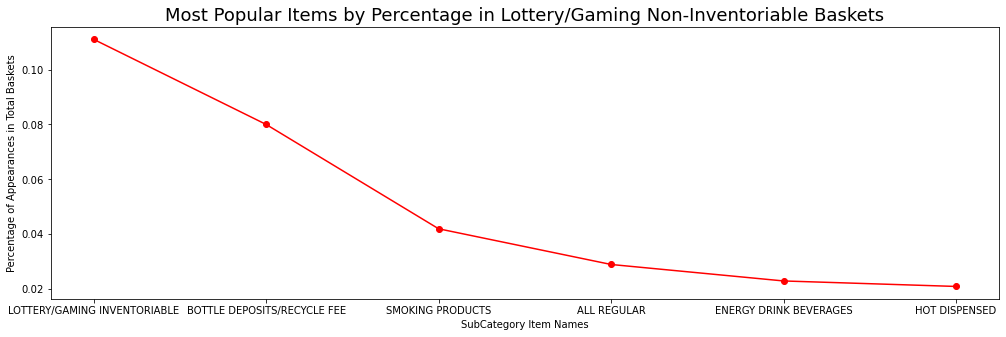

In [116]:
grouped_baskets.sort_values(['Percentage of All Baskets'], ascending=False, inplace=True)
comp = grouped_baskets.copy()
plt.rcParams['figure.figsize'] = [17, 5]
plt.xlabel("SubCategory Item Names")
plt.ylabel("Percentage of Appearances in Total Baskets")
plt.title("Most Popular Items by Percentage in Lottery/Gaming Non-Inventoriable Baskets", size=18)
plt.plot(grouped_baskets.index[1:7], grouped_baskets['Percentage of All Baskets'][1:7], marker = 'o', color = 'red')
plt.show()

### Most Common Items purchased with Lottery/Gaming Inventoriable Sales

Key Takeaways:
- **Lottery/Gaming Non-Inventoriable** (Ex. lottery tickets) only appeared in 8.7% of all sales that included Inventoriable Tickets such as scratchoffs.
- **Smoking Products** only appeared in 4.1% of these sales, **Energy Drink Beverages** appeared in 2.4% of these sales, **Beer** only appeared in 0.8% of these sales. 

In [117]:
invent_baskets = basket_data[['BasketID','TransactionID','FranchiseID','SubCategoryName','TransactionTimeStamp','TotalSales','TotalQuantity','County','Lottery','Estimated Jackpot']]
basket_invent_ids = invent_baskets[invent_baskets ['SubCategoryName'] == 'LOTTERY/GAMING INVENTORIABLE']['BasketID'].tolist()
invent_baskets = invent_baskets.groupby(['BasketID','SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum','County':'first','Lottery':'first','Estimated Jackpot':'first', 'TransactionTimeStamp':'first', 'FranchiseID':'first'}).reset_index()
invent_baskets = invent_baskets[(invent_baskets['BasketID'].isin(basket_invent_ids))]

# Round Estimated Jackpot to nearest floor 100 value (Ex. 492 would be 400)
invent_baskets['Estimated Jackpot'] = (invent_baskets['Estimated Jackpot'] / 100).astype(int) *100

grouped_baskets = invent_baskets.groupby(['SubCategoryName']).agg({'TotalSales':'mean', 'TotalQuantity':'mean','FranchiseID':'count'})
grouped_baskets.rename(columns={'FranchiseID':'TotalCount', 'TotalSales':'AverageSales','TotalQuantity':'AverageQuantity'}, inplace=True)
grouped_baskets['Percentage of All Baskets'] = round(grouped_baskets['TotalCount'] / len(np.unique(basket_invent_ids)),3)
grouped_baskets.sort_values(['TotalCount','SubCategoryName'], ascending=False).head(20)

,AverageSales,AverageQuantity,TotalCount,Percentage of All Baskets
SubCategoryName,,,,
LOTTERY/GAMING INVENTORIABLE,17.652838,2.232444,530445,1.000
LOTTERY/GAMING NON-INVENTORIABLE,9.757407,7.669426,45908,0.087
BOTTLE DEPOSITS/RECYCLE FEE,0.136117,2.072655,41346,0.078
SMOKING PRODUCTS,10.936380,2.163145,21772,0.041
ALL REGULAR,24.887460,5.820501,14916,0.028
ENERGY DRINK BEVERAGES,4.016230,1.533990,12886,0.024
HOT DISPENSED,1.893879,1.120102,12581,0.024
SALTY SNACKS,2.722791,1.330081,10146,0.019
PKGD SWEET SNACKS,2.517601,1.202740,10072,0.019


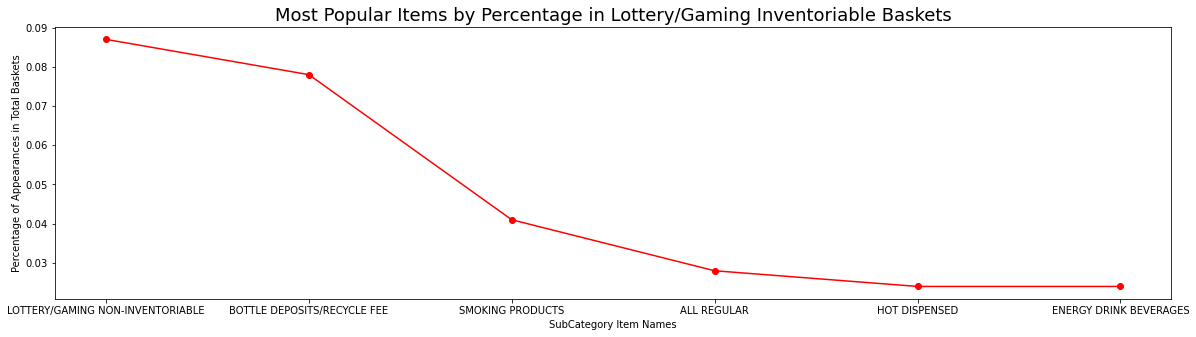

In [118]:
grouped_baskets.sort_values(['Percentage of All Baskets'], ascending=False, inplace=True)
plt.rcParams['figure.figsize'] = [20, 5]
plt.xlabel("SubCategory Item Names")
plt.ylabel("Percentage of Appearances in Total Baskets")
plt.title("Most Popular Items by Percentage in Lottery/Gaming Inventoriable Baskets", size=18)
plt.plot(grouped_baskets.index[1:7], grouped_baskets['Percentage of All Baskets'][1:7], marker = 'o', color = 'red')
plt.show()

In [119]:
# Used to calculate the percentage of how much a SubCategory appears in all baskets within the same Jackpot Size
def percentageBasket(row):
    if row['Estimated Jackpot'] == 0:
        return round(row['TotalCount'] / baskets_0, 3)
    elif row['Estimated Jackpot'] == 100:
        return round(row['TotalCount'] / baskets_100, 3)
    elif row['Estimated Jackpot'] == 200:
        return round(row['TotalCount'] / baskets_200, 3)
    elif row['Estimated Jackpot'] == 300:
        return round(row['TotalCount'] / baskets_300, 3)
    elif row['Estimated Jackpot'] == 400:
        return round(row['TotalCount'] / baskets_400, 3)
    elif row['Estimated Jackpot'] == 500:
        return round(row['TotalCount'] / baskets_500, 3)
    elif row['Estimated Jackpot'] == 600:
        return round(row['TotalCount'] / baskets_600, 3)
    elif row['Estimated Jackpot'] == 700:
        return round(row['TotalCount'] / baskets_700, 3)
    elif row['Estimated Jackpot'] == 800:
        return round(row['TotalCount'] / baskets_800, 3)
    elif row['Estimated Jackpot'] == 900:
        return round(row['TotalCount'] / baskets_900, 3)
    elif row['Estimated Jackpot'] == 1000:
        return round(row['TotalCount'] / baskets_1000, 3)

### Correlation Evaluation of Jackpot Sales versus SubCategory Item Sales

This next dataframe below looks specifically at the Estimated Jackpot size and how it relates to SubCategory item sales. To simplify the visability, we selected Beer, Carborated Soft Drinks, Energy Drink Beverages, Lottery/Gaming Inventoriable and Smoking Products to view how sales may or may not change as the Estimated Jackpot increases. The *'Percentage of All Baskets'* refers to the number of total basket transactions when the lottery was a certain size. For example, Beer at Estimated Jackpot '0' would refer to how common Beer Sales for all baskets in which a Lottery/Gaming Non-Inventoriable ticket was sold and the Lottery Jackpot was between 1-99 million. 

Key Takeaways:
- **Beer** showed an extremely mild increase in percentage sales when the Jackpot increased about 500 million. 
- **Carbonated Soft Drinks** and **Energy Drink Beverages** showed relatively no correlation between increased Jackpot size and sales. 
- **Lottery/Gaming Inventoriable** showed a relatively steady decrease from 12% to 6% as the Jackpot size increased from 1 million to 1 billion. There seems to be a relationship here in which more tickets are purchased towards Non-Inventoriable tickets and Inventoriable shows a slight decrease in relationship to this. 
- **Smoking Products** also showed a very mild decrease from 4.5% to 3% as the Jackpot size increased. 

In [120]:
grouped_baskets = individual_baskets.groupby(['SubCategoryName','Estimated Jackpot']).agg({'TotalSales':'mean', 'TotalQuantity':'mean','FranchiseID':'count'})
grouped_baskets.rename(columns={'FranchiseID':'TotalCount','TotalSales':'AverageSales','TotalQuantity':'AverageQuantity'}, inplace=True)
grouped_baskets = grouped_baskets.reset_index()
grouped_baskets['Percentage of All Baskets'] = grouped_baskets.apply(percentageBasket, axis=1)
grouped_baskets = grouped_baskets.groupby(['SubCategoryName','Estimated Jackpot']).agg({'AverageSales':'mean', 'AverageQuantity':'mean','TotalCount':'sum', 'Percentage of All Baskets':'first'})
selected_columns = ['LOTTERY/GAMING INVENTORIABLE','SMOKING PRODUCTS','ENERGY DRINK BEVERAGES','CARBONATD SFT DRINKS','BEER', 'LOTTERY/GAMING NON-INVENTORIABLE']
grouped_baskets.sort_values(['SubCategoryName'], ascending=False, inplace=True)
grouped_baskets.loc[selected_columns].sort_values(['SubCategoryName','Estimated Jackpot'])

AverageSales  \
SubCategoryName                  Estimated Jackpot                 
BEER                             0                      8.078854   
                                 100                    8.473203   
                                 200                    8.973364   
                                 300                    8.475745   
                                 400                    8.220676   
                                 500                    8.517129   
                                 600                    8.370619   
                                 700                    8.072000   
                                 800                    8.605862   
                                 1000                   9.994902   
CARBONATD SFT DRINKS             0                      3.070729   
                                 100                    2.979366   
                                 200                    2.971855   
                                 300                    3.061304   
                                 400                    3.027874   
                                 500                    2.975918   
                                 600                    3.042312   
                                 700                    2.770594   
                                 800                    2.707385   
                                 1000                   2.748917   
ENERGY DRINK BEVERAGES           0                      4.067386   
                                 100                    4.007555   
                                 200                    4.100866   
                                 300                    4.134578   
                                 400                    4.236362   
                                 500                    4.053235   
                                 600                    4.146111   
                                 700                    4.327677   
                                 800                    4.285543   
                                 1000                   4.379338   
LOTTERY/GAMING INVENTORIABLE     0                     16.453000   
                                 100                   16.969923   
                                 200                   17.103901   
                                 300                   17.610700   
                                 400                   16.688156   
                                 500                   17.490746   
                                 600                   16.145247   
                                 700                   15.304974   
                                 800                   14.835017   
                                 1000                  13.883117   
LOTTERY/GAMING NON-INVENTORIABLE 0                      9.719315   
                                 100                    9.650023   
                                 200                    9.852825   
                                 300                   10.315715   
                                 400                   10.542102   
                                 500                   11.177725   
                                 600                   11.646282   
                                 700                   13.222457   
                                 800                   14.365634   
                                 1000                  12.942114   
SMOKING PRODUCTS                 0                     13.952118   
                                 100                   13.960628   
                                 200                   14.706289   
                                 300                   14.551659   
                                 400                   14.627848   
                                 500                   14.144188   
                                 600                   14.663288   
                                 700    

### Most Common Items among All Baskets

It is important to consider how the tendencies of Lottery/Gaming Non-Inventoriable purchases differ from the overall trend of all customer purchases in the dataset. Referring back to the "Most Common Items purchased with Lottery/Gaming Non-Inventoriable Sales" section, **Lottery/Gaming Inventoriable** appeared in only 11% of those basket sales. With all baskets, it appeared in only 5.4%. **Smoking Products** appeared in only 4.2% of Non-Inventoriable sales while it appeared in 8.4% of all basket sales. **Energy Drink Beverages**, **Salty Snacks**, **Bottled Water** and several other items saw a 1-2% increase in all basket sales. From this, it would appear as though **Lottery/Gaming Non-Inventoriable** sales do not have a direct correlation to the sales of other items aside from potentially **Lottery/Gaming Inventoriable** sales. Even with this, the Inventoriable sales only appeared in 11% of total non-inventoriable sales.

In [121]:
individual_baskets = basket_data[['BasketID','TransactionID','FranchiseID','SubCategoryName','TransactionTimeStamp','TotalSales','TotalQuantity','County','Lottery','Estimated Jackpot', 'Lottery Average']]
individual_baskets = individual_baskets.groupby(['BasketID','SubCategoryName']).agg({'TotalSales':'sum', 'TotalQuantity':'sum','County':'first','Lottery':'first','Estimated Jackpot':'first', 'TransactionTimeStamp':'first', 'FranchiseID':'first','Lottery Average':'first'}).reset_index()

# Round Estimated Jackpot to nearest floor 100 value (Ex. 492 would be 400)
individual_baskets['Estimated Jackpot'] = (individual_baskets['Estimated Jackpot'] / 100).astype(int) *100

num_baskets = len(np.unique(individual_baskets['BasketID']))
grouped_baskets = individual_baskets.groupby(['SubCategoryName']).agg({'TotalSales':'mean', 'TotalQuantity':'mean','FranchiseID':'count'})
grouped_baskets.rename(columns={'FranchiseID':'TotalCount', 'TotalSales':'AverageSales','TotalQuantity':'AverageQuantity'}, inplace=True)
grouped_baskets['Percentage of All Baskets'] = round(grouped_baskets['TotalCount'] / num_baskets,3)
grouped_baskets.sort_values(['TotalCount','SubCategoryName'], ascending=False).head(15)

,AverageSales,AverageQuantity,TotalCount,Percentage of All Baskets
SubCategoryName,,,,
ALL REGULAR,38.182941,8.814655,3226154,0.327
BOTTLE DEPOSITS/RECYCLE FEE,0.150627,2.261658,1883164,0.191
ALL HIGH - GRADE,42.965160,9.306647,1426493,0.145
ALL MID - GRADE,39.360683,8.751211,995286,0.101
SMOKING PRODUCTS,12.075641,2.266406,830001,0.084
ENERGY DRINK BEVERAGES,4.134751,1.543411,591543,0.060
LOTTERY/GAMING INVENTORIABLE,17.652838,2.232444,530445,0.054
BOTTLED WATER,2.876569,1.312610,482087,0.049
SALTY SNACKS,2.844795,1.341104,435029,0.044


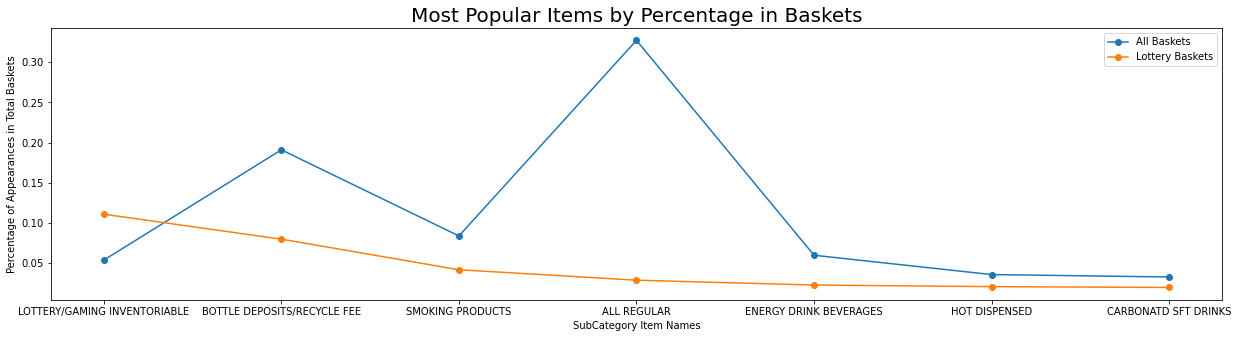

In [123]:
grouped_baskets.sort_values(['Percentage of All Baskets'], ascending=False, inplace=True)

tmp = comp.merge(grouped_baskets, on='SubCategoryName')

plt.rcParams['figure.figsize'] = [21, 5]
plt.xlabel("SubCategory Item Names")
plt.ylabel("Percentage of Appearances in Total Baskets")
plt.title("Most Popular Items by Percentage in Baskets", size=20)
plt.plot(tmp.index[1:8], tmp['Percentage of All Baskets_y'][1:8], marker = 'o', label='All Baskets')
plt.plot(tmp.index[1:8], tmp['Percentage of All Baskets_x'][1:8], marker = 'o', label='Lottery Baskets')
plt.legend()
plt.show()

## Lottery/Gaming Basket Frequency vs Lottery Average

In [124]:
individual_baskets = basket_data[['BasketID','TransactionID','FranchiseID','SubCategoryName','TransactionTimeStamp','TotalSales','TotalQuantity','County','Lottery','Estimated Jackpot','Lottery Average']]
individual_baskets = individual_baskets.groupby(['BasketID','SubCategoryName','Lottery Average']).agg({'TotalSales':'sum', 'TotalQuantity':'sum','County':'first','Lottery':'first','Estimated Jackpot':'first', 'TransactionTimeStamp':'first', 'FranchiseID':'first'}).reset_index()

individual_baskets['Lottery Average'] = (individual_baskets['Lottery Average'] / 100).astype(int) *100

individual_baskets[individual_baskets['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE'].groupby(['SubCategoryName','Lottery Average']).agg({'TotalSales':'mean','TotalQuantity':'mean'})

TotalSales  TotalQuantity
SubCategoryName                  Lottery Average                           
LOTTERY/GAMING NON-INVENTORIABLE 0                  9.695887       7.078180
                                 100                9.641800       7.074988
                                 200               10.042143       7.336051
                                 300               10.367211       7.527749
                                 400               10.822647       7.904205
                                 500               11.632567       8.474557
                                 600               12.770084       9.479665
                                 700               13.512594       9.581515
                                 800               12.942114       9.864228

As the lottery average increased, the average amount and quantity of lottery tickets purchased steadly increased. However, did the frequency of baskets that contained lottery tickets increase, decrease or stay the same as the jackpot average increased? We will calculate the number of baskets that contained lottery tickets for each basket purchased during 100 million jackpot average intervals. With this, we can compute the percentage of baskets that contained lottery tickets out of the total baskets in each jackpot range. 

#### Lottery/Gaming Non-Inventoriable Frequency

In [125]:
tmp = individual_baskets.groupby(['Lottery Average'])['BasketID'].nunique().reset_index()
tmp.rename(columns = {'BasketID':'Total Baskets'}, inplace=True)
tmp = tmp.groupby('Lottery Average').agg({'Total Baskets':'sum'})

lottery_count = individual_baskets[individual_baskets['SubCategoryName'] == 'LOTTERY/GAMING NON-INVENTORIABLE'].groupby(['Lottery Average']).agg({'BasketID':'count'})
lottery_count.rename(columns = {'BasketID':'Total Lottery Baskets'}, inplace=True)

percentages = pd.merge(tmp, lottery_count, on = ['Lottery Average'])
percentages.rename(columns = {'Total Lottery Baskets':'Lottery Baskets'}, inplace=True)
percentages = percentages[['Lottery Baskets','Total Baskets']]

In [126]:
percentages['Percentage'] = round(percentages['Lottery Baskets'] / percentages['Total Baskets'],2)
percentages

,Lottery Baskets,Total Baskets,Percentage
Lottery Average,,,
0,101484,2938193,0.03
100,115698,3185320,0.04
200,77759,1840117,0.04
300,54884,1120145,0.05
400,25920,430816,0.06
500,11398,140970,0.08
600,10991,104154,0.11
700,10084,79424,0.13
800,6150,30655,0.20


#### Lottery/Gaming Inventoriable Frequency

In [127]:
tmp = individual_baskets.groupby(['Lottery Average'])['BasketID'].nunique().reset_index()
tmp.rename(columns = {'BasketID':'Total Baskets'}, inplace=True)
tmp = tmp.groupby('Lottery Average').agg({'Total Baskets':'sum'})

lottery_count = individual_baskets[individual_baskets['SubCategoryName'] == 'LOTTERY/GAMING INVENTORIABLE'].groupby(['Lottery Average']).agg({'BasketID':'count'})
lottery_count.rename(columns = {'BasketID':'Total Lottery Baskets'}, inplace=True)

percentages = pd.merge(tmp, lottery_count, on = ['Lottery Average'])
percentages.rename(columns = {'Total Lottery Baskets':'Lottery Baskets'}, inplace=True)
percentages = percentages[['Lottery Baskets','Total Baskets']]

percentages['Percentage'] = round(percentages['Lottery Baskets'] / percentages['Total Baskets'],2)
percentages

,Lottery Baskets,Total Baskets,Percentage
Lottery Average,,,
0,159327,2938193,0.05
100,170902,3185320,0.05
200,97535,1840117,0.05
300,58693,1120145,0.05
400,22958,430816,0.05
500,8858,140970,0.06
600,5986,104154,0.06
700,4542,79424,0.06
800,1644,30655,0.05


The key column to pay attention to is "Percentage". The "Lottery Baskets" column represents the number of total baskets that contained a Lottery/Gaming Non-Inventoriable purchase for that range of jackpot average size. The total baskets represent the number of total basket transactions for the given jackpot average size.

With this, we found that the percentage of baskets that contained lottery tickets increased steadly as the jackpot size increased. With a jackpot size of 1-100 million, roughly 3% of baskets contained a lottery ticket purchase. As the jackpot size approached about 600 million, over 10% of baskets contained a lottery tickey purchase. It is important to note that there was a much more significant sample size of baskets for lower lottery averages and likely with more baskets, the max percentages would deviate closer to the mean. However, this significant increase of nearly 17% is very interesting and something to continue to explore. 

Lottery/Gaming Inventoriable showed nearly no changes in percentage as the jackpot increased. It increased by 1% as the lottery size increased over 500 Million, however, this could be attributed as a relatively smaller sample size. 

In [128]:
del comp
del tmp
del percentages
del basket_data
del individual_baskets
del grouped_baskets
gc.collect()

34554

# Conclusion

The goal of this analysis was to answer the following questions:

- Is there a correlation between the size of the lottery jackpot and inside sales at a convenience store?
- Is the impact on sale exaggerated when both lotteries have jackpots above a certain amount?
- How are the sales of other items impacted when jackpots are larger (i.e. greater than \\$100million)?
- Does the customer basket side change based on the lottery sales purchases?



**1. Is there a correlation between the size of the lottery jackpot and inside sales at a convenience store?**

Based on the analysis we have conducted, there is not a direct relationship with inside sales and the size of the lottery jackpot. The Pearson correlation coefficient which measures the strength and linear relationship of two variables was -0.088 between total daily sales and jackpot size which indicates nearly no relationship between the two variables. Lottery/Gaming Non-Inventoriable items such as Mega Millions/Powerball tickets were the one outlier to the previous statement as it exhibited a correlation coefficient of 0.679 between sales and jackpot size. This is a moderate to strong linear relationship which means as the jackpot increased, the sales tended to increase at a similar pace. Lottery/Gaming Inventoriable sales such as scratchoffs showed a correlation coefficient of 0.07 which means that these sales were unaffected by the increase in jackpot size. Beer, Smoking Products, Energy Beverages as well as other subcategory sales exhibited no significant change as well. Therefore, we can say that there is a strong correlation between lottery ticket sales and jackpot size, however, there is not a direct relationship between overall inside sales and jackpot size. 

**2. Is the impact on sale exaggerated when both lotteries have jackpots above a certain amount?**

Yes, the difference specifically with Lottery/Gaming Non-Inventoriable was exaggerated once the jackpot exceeded 400 million. The sales increased from an \\$281.72 daily per store with a jackpot of 1-99 Million to \\$353.29 with a jackpot of 300-399 Million. An increase of nearly 25.4%. The Lottery/Gaming Non-Inventoriable sales from 400-499 Million to 600+ Million increased from \\$452.82 to \\$1,163.45, an increase of nearly 157% . It is important to note that there is a significant disparity between the number of dates under 300 million (284 days) and dates over 300 million (81 days). The week days that showed the greatest change in lottery ticket sales as the jackpot increased was Tuesday, Friday and Saturday. As the lottery increased past 400 million, lottery non-inventoriable sales increased by nearly over \\$2 on average on Tuesdays. Friday and Saturday exhibited an increase of a \\$1 as the lottery reached over 400 million. 

**3. How are the sales of other items impacted when jackpots are larger (i.e. greater than $100million)?**

As mentioned in the first question, the sales of other items were not significantly impacted as the jackpots were larger. Items such as Smoking Products and Lottery/Gaming Inventoriable saw a very minimal decrease of 0.01\% in appearances amongst customer baskets as the lottery size increased from under 100 million to over 600 million. Out of all non-lottery related inside sales items, Smoking Products had a correlation coefficient of -0.137 which indicated that as the jackpot size increased, smoking product sales decreased by a relatively statistically insignificant amount. While this was the highest correlation relationship amongst non-lottery items, -0.137 still indicates a very weak relationship between smoking products sales and jackpot size.

**4. Does the customer basket side change based on the lottery sales purchases?**

The customer basket pattern did show a significant difference among baskets that included a lottery sales purchase versus the average customer basket. Lottery/Gaming Inventoriable sales appeared in 11% of baskets that included a Lottery/Gaming Non-Inventoriable purchase while it only appeared in 5.4% of all baskets in the dataset. Smoking Products appeared in 8.4% of all baskets while it only appeared 4.2% of Lottery/Gaming Non-Inventoriable baskets which matches the slightly negative correlation of -0.137 that we discussed in the previous section. Energy Drinks decreased from 6.0% of all baskets to 2.4% among the lottery baskets. 

The most common basket side item for Lottery/Gaming Non-Inventoriable purchases was Lottery/Gaming Inventoriable purchases which appeared 11\% of the time with an average of a \\$16.75 purchase. Smoking Products appeared only 4.2\% of the time with a purchase average of \\$14.21. Energy drinks, hot dispensed beverages and carbonated soft drinks all appeared under 2% of all sales that involved a lottery ticket purchase. Because of this, we can conclude that on average, if a customer purchases a lottery ticket, they are statistically less likely to add one of these additional items in the same basket than if they didn't purchase a lottery ticket. 

**5. What did we learn from this analysis? How is this useful?**

Lottery/Gaming Non-Inventoriable sales, specifically electronic/online lottery ticket sales, showed a definite positive relationship between increased jackpot size and increased lottery ticket sales. This relationship did not span evenly across all days of the week. Tuesday, Friday and Saturday showed the greatest impact of jackpot size on lottery ticket sales (\\$1-2 increase per basket) while Thursday and Sunday were much less affected. As the jackpot size increased, the more likely a customer is to spent an additional $1-2 on a lottery ticket purchase.

Based on the analysis we have conducted, we have found very little evidence to suggest anything beyond a weak relationship between non-lottery item sales and jackpot size. Smoking products showed a mild negative correlation which suggests that a customer may spend an extra \\$1 on a lottery ticket and inversely spend \\$1 less on a smoking product. Among baskets that contained a lottery ticket purchase, the most common side item was lottery/gaming inventoriable items such as scratchoffs which appeared in only 11\% of those sales. Smoking products, beverages and snacks only appeared in under 5\% of all lottery ticket baskets which indicates that as lottery ticket sales increased, other items would not be directly affected and a change in product quantity would not be needed based on a change in jackpot size. Smoking products, energy beverages and many other products appeared in 2-3\% less of lottery ticket baskets in comparison to all baskets. 

Moving forward, based on what we have evaluated, as the jackpot increases beyond 300-400 million, it is expected that lottery ticket sales would exhibit a similar increase in sales that range from a \\$0.50 to \\$2.00 increase per customer transaction depending on the weekday. While lottery inventoriable is much less consistent and showed a very weak correlation, it is expected that a minor slight increase in sales would occur if the lottery size increased. 